# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
model_name = 'deepseek-coder-v2'
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
}

file_db = "~/Downloads/chinook.sqlite"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [3]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [4]:
vn = MyVanna(config=CONFIG)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [9]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [10]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [11]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [12]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [13]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


In [14]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]

### Loop over questions

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 2:  Can you list all tables in the SQLite database catalog?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_stat1(tbl,idx,stat)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "genres"\r\n(\r\n    GenreId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,

SELECT name FROM sqlite_master WHERE type='table'

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Can you list all tables in the SQLite database catalog?'\n\nThe DataFrame was produced using this query: SELECT name FROM sqlite_master WHERE type='table'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n name    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10-12T17:11:30.800030527Z', 'message': {'role': 'assistant', 

import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=1,
        title={"text": "Number of Tables"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = px.bar(df, x='name', y=None, text_auto='.s')

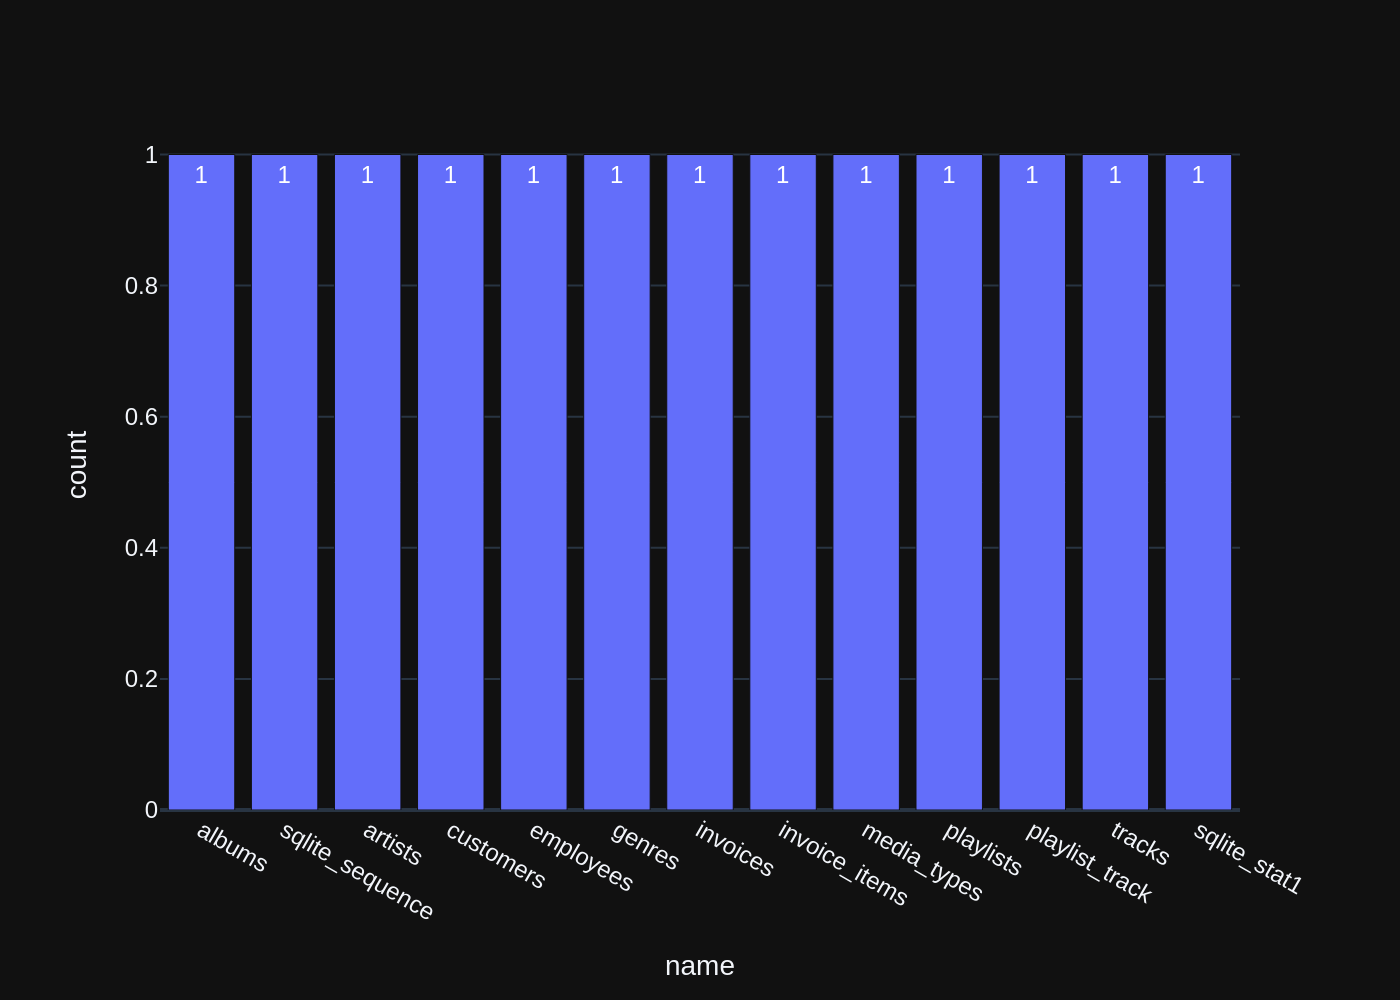

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 3:  which table stores customer's orders


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n 

SELECT DISTINCT InvoiceId, CustomerId, InvoiceDate, BillingAddress, BillingCity, BillingState, BillingCountry, BillingPostalCode, Total
FROM invoices

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'which table stores customer's orders'\n\nThe DataFrame was produced using this query: SELECT DISTINCT InvoiceId, CustomerId, InvoiceDate, BillingAddress, BillingCity, BillingState, BillingCountry, BillingPostalCode, Total\nFROM invoices\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId              int64\nCustomerId             int64\nInvoiceDate           object\nBillingAddress        object\nBillingCity           object\nBillingState          object\nBillingCountry        object\nBillingPostalCode     object\nTotal                float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the 

import plotly.graph_objects as go
import pandas as pd

if df.shape[0] == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['Total'].values[0],
        title={"text": "Total"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
else:
    fig = go.Figure(data=[go.Table(header=dict(values=['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']),
                                   cells=dict(values=[df['InvoiceId'], df['CustomerId'], df['InvoiceDate'], df['BillingAddress'], df['BillingCity'], df['BillingState'], df['BillingCountry'], df['BillingPostalCode'], df['Total']]))])

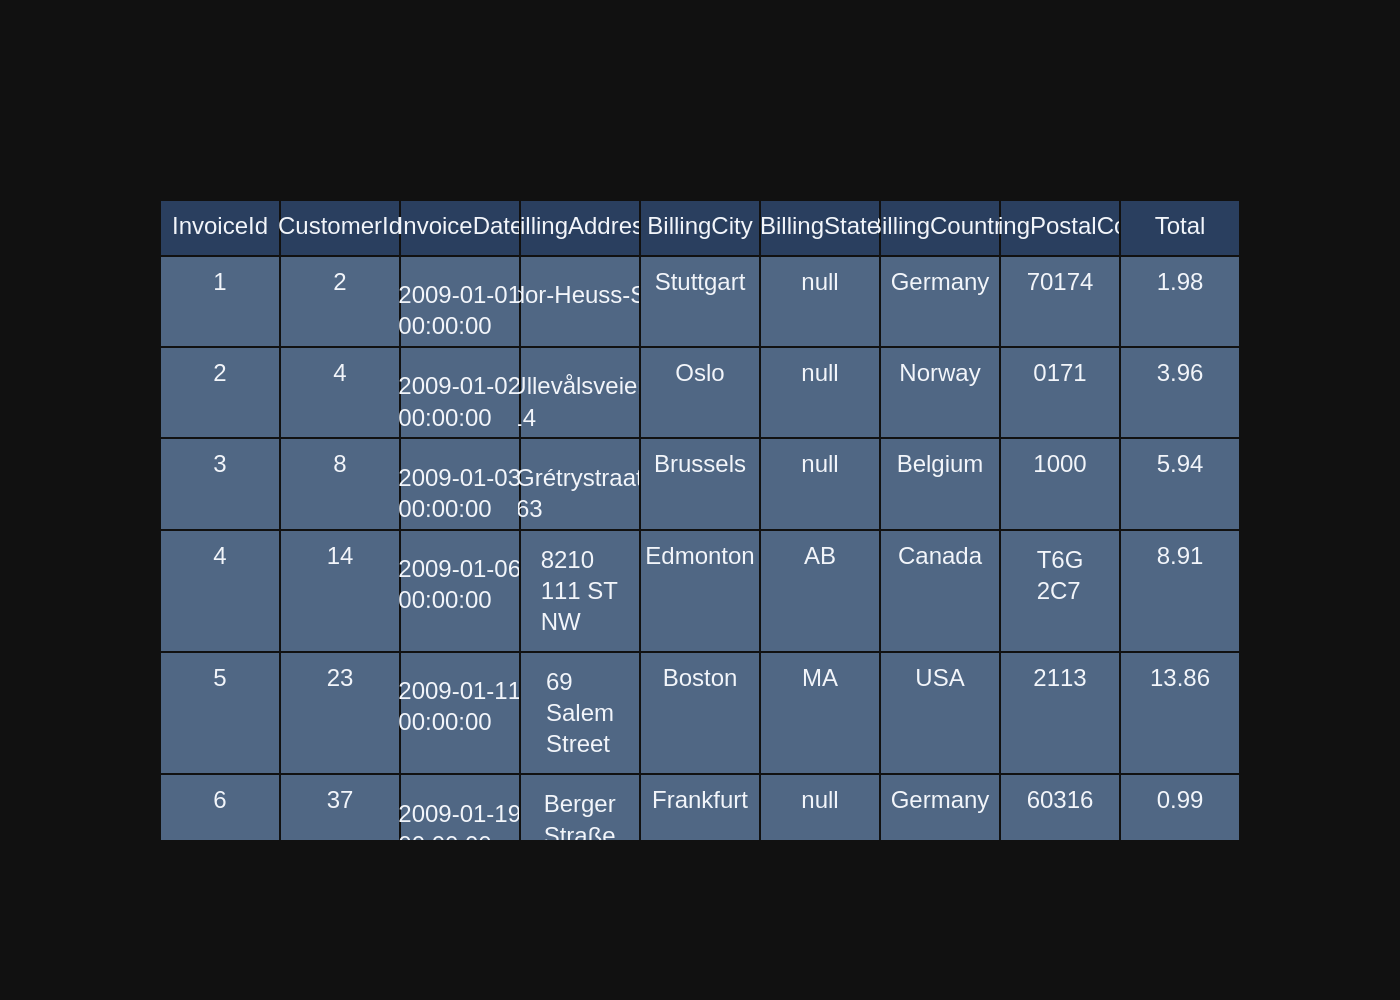

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 4:  How many customers are there


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName N

SELECT COUNT(*) AS NumberOfCustomers FROM customers

,NumberOfCustomers
0,59



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'How many customers are there'\n\nThe DataFrame was produced using this query: SELECT COUNT(*) AS NumberOfCustomers FROM customers\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n NumberOfCustomers    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10-12T17:13:37.347177044Z', 'message': {'role': 'assistant', 'content': ' 

import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['NumberOfCustomers'].iloc[0],
        title={"text": "Number of Customers"}
    ))
else:
    fig = go.Figure(go.Bar(
        x=['NumberOfCustomers'],
        y=[df['NumberOfCustomers'].iloc[0]]
    ))

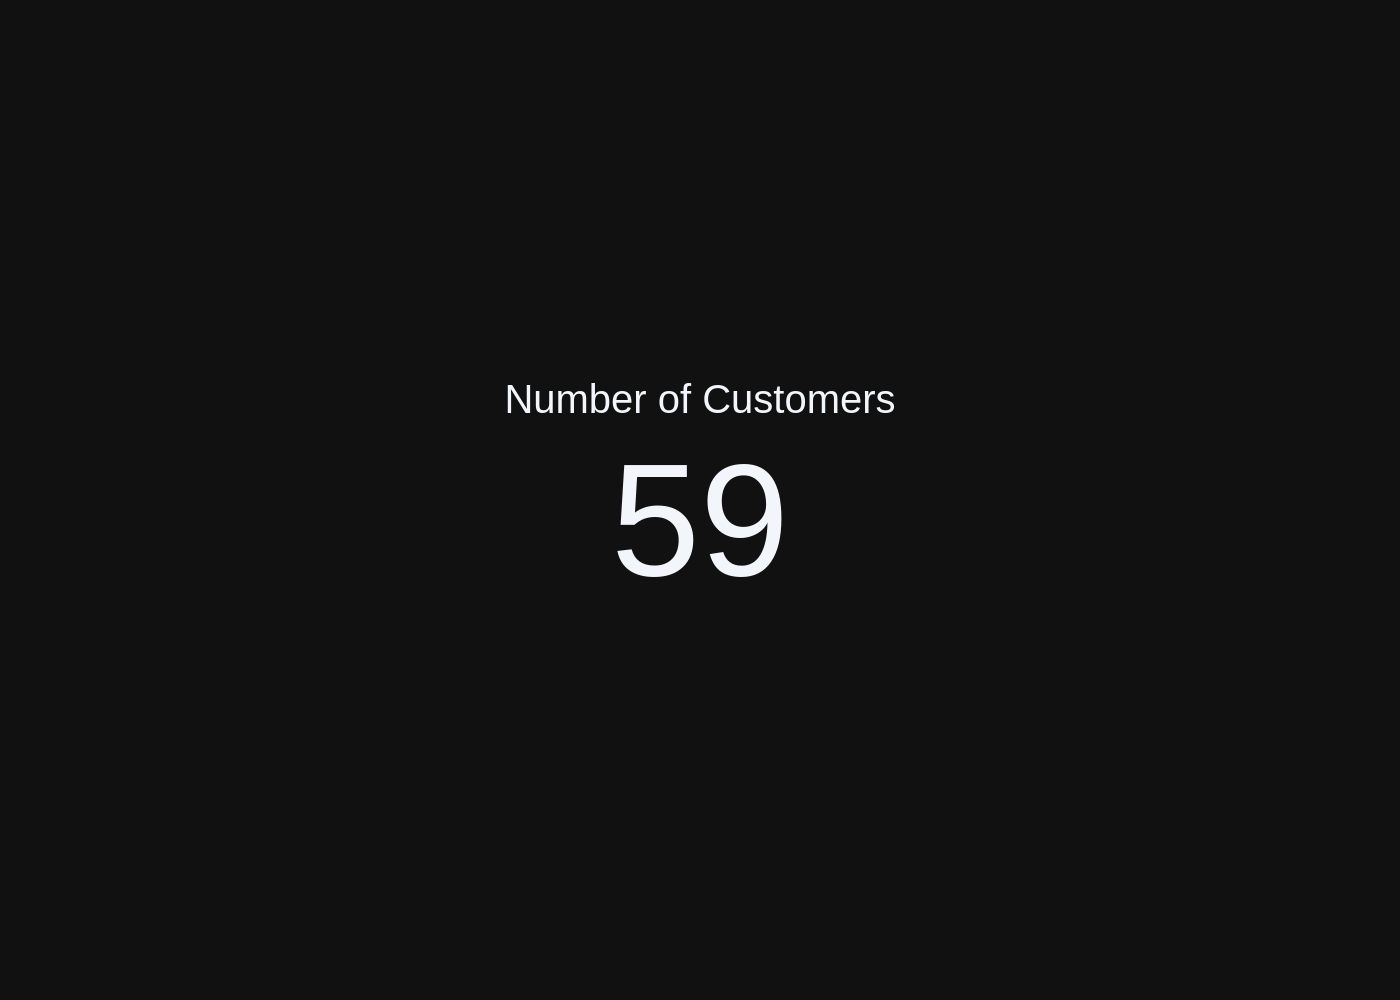

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 5:  what are the top 5 countries that customers come from?


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCH

SELECT BillingCountry, COUNT(*) AS CustomerCount
FROM customers
GROUP BY BillingCountry
ORDER BY CustomerCount DESC
LIMIT 5

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Addr

SELECT country AS Top5Countries, COUNT(*) AS CustomerCount
FROM customers
GROUP BY country
ORDER BY CustomerCount DESC
LIMIT 5

,Top5Countries,CustomerCount
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '\n        For the question what are the top 5 countries that customers come from?, \n        the generated SQL statement  SELECT BillingCountry, COUNT(*) AS CustomerCount\nFROM customers\nGROUP BY BillingCountry\nORDER BY CustomerCount DESC\nLIMIT 5 results in the following exception [ERROR-DB] Failed to execute SQL:  SELECT BillingCountry, COUNT(*) AS CustomerCount\nFROM customers\nGROUP BY BillingCountry\nORDER BY CustomerCount DESC\nLIMIT 5\n Execution failed on sql ' SELECT BillingCountry, COUNT(*) AS CustomerCount\nFROM customers\nGROUP BY BillingCountry\nORDER BY CustomerCount DESC\nLIMIT 5': no such column: BillingCountry .\n        Please fix the error and re-generate the SQL\n        '\n\nThe DataFrame was produced using this qu

import plotly.graph_objects as go

if len(df) == 1:
    fig = go.Figure(data=[go.Indicator(value=df['CustomerCount'].iloc[0], title={'text': "Top Country by Customer Count"})])
else:
    fig = go.Figure(data=[go.Bar(x=df['Top5Countries'], y=df['CustomerCount'])])

fig.update_layout(title='Top 5 Countries by Customer Count', xaxis_title='Country', yaxis_title='Number of Customers')

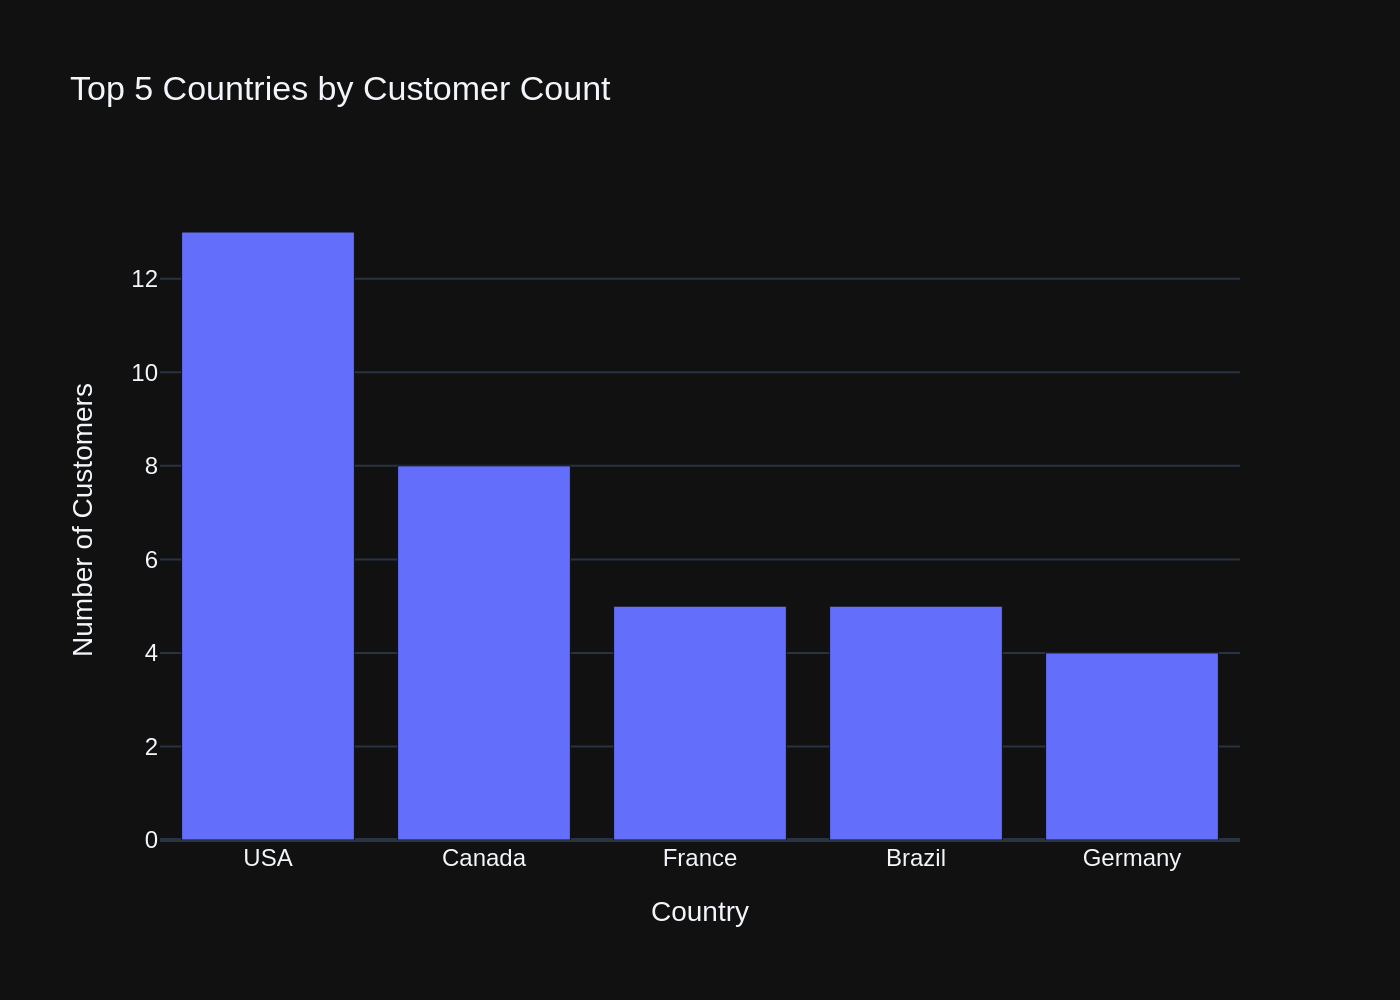

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 6:  List all albums and their corresponding artist names  


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(1

SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName
FROM albums a
JOIN artists ar ON a.ArtistId = ar.ArtistId

,AlbumTitle,ArtistName
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
...,...,...
342,Respighi:Pines of Rome,Eugene Ormandy
343,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
344,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
345,Mozart: Chamber Music,Nash Ensemble



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all albums and their corresponding artist names  '\n\nThe DataFrame was produced using this query: SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName\nFROM albums a\nJOIN artists ar ON a.ArtistId = ar.ArtistId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n AlbumTitle    object\nArtistName    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:l

import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(value=1, title="Album and Artist")
else:
    fig = px.bar(df, x='AlbumTitle', y='ArtistName', text='ArtistName')
    fig.update_layout(title='Albums and Their Corresponding Artists')

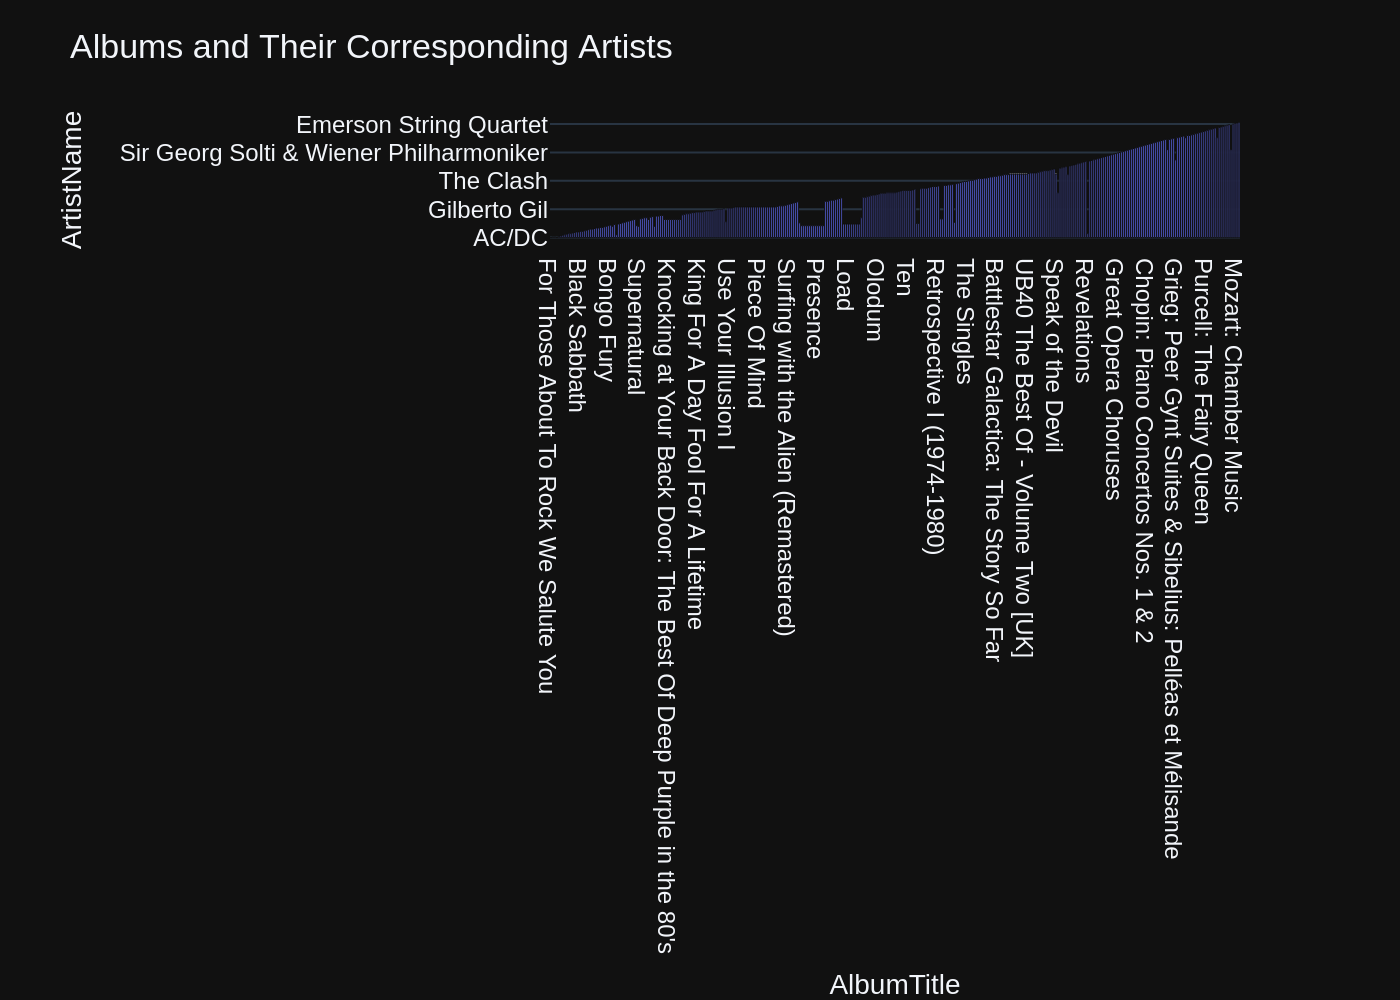

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 7:  Find all tracks with a name containing "What" (case-insensitive) 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DEL

SELECT * FROM tracks
WHERE LOWER(Name) LIKE '%what%'

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,26,What It Takes,5,1,1,"Steven Tyler, Joe Perry, Desmond Child",310622,10144730,0.99
1,88,What You Are,10,1,1,Audioslave/Chris Cornell,249391,5988186,0.99
2,130,Do what cha wanna,13,1,2,George Duke,274155,9018565,0.99
3,342,What is and Should Never Be,30,1,1,Jimmy Page/Robert Plant,260675,8497116,0.99
4,607,So What,48,1,2,Miles Davis,564009,18360449,0.99
5,960,What A Day,76,1,1,"Mike Bordin, Billy Gould, Mike Patton",158275,5203430,0.99
6,1000,What If I Do?,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",302994,9929799,0.99
7,1039,What Now My Love,83,1,12,carl sigman/gilbert becaud/pierre leroyer,149995,4913383,0.99
8,1145,Whatsername,89,1,4,Green Day,252316,8244843,0.99
9,1440,"Whatever It Is, I Just Can't Stop",116,1,1,"Jay Kay/Kay, Jay",247222,8249453,0.99



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all tracks with a name containing \"What\" (case-insensitive) '\n\nThe DataFrame was produced using this query:  SELECT * FROM tracks\nWHERE LOWER(Name) LIKE '%what%'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n TrackId           int64\nName             object\nAlbumId           int64\nMediaTypeId       int64\nGenreId           int64\nComposer         object\nMilliseconds      int64\nBytes             int64\nUnitPrice       float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Resp

import plotly.graph_objects as go
import pandas as pd

# Check if the DataFrame has more than one row
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['TrackId'].iloc[0],
        title={"text": "Track ID"},
        number={'prefix': ''}
    ))
else:
    fig = go.Figure(data=[go.Scatter(x=df['Name'], y=df['Milliseconds'], mode='markers')])

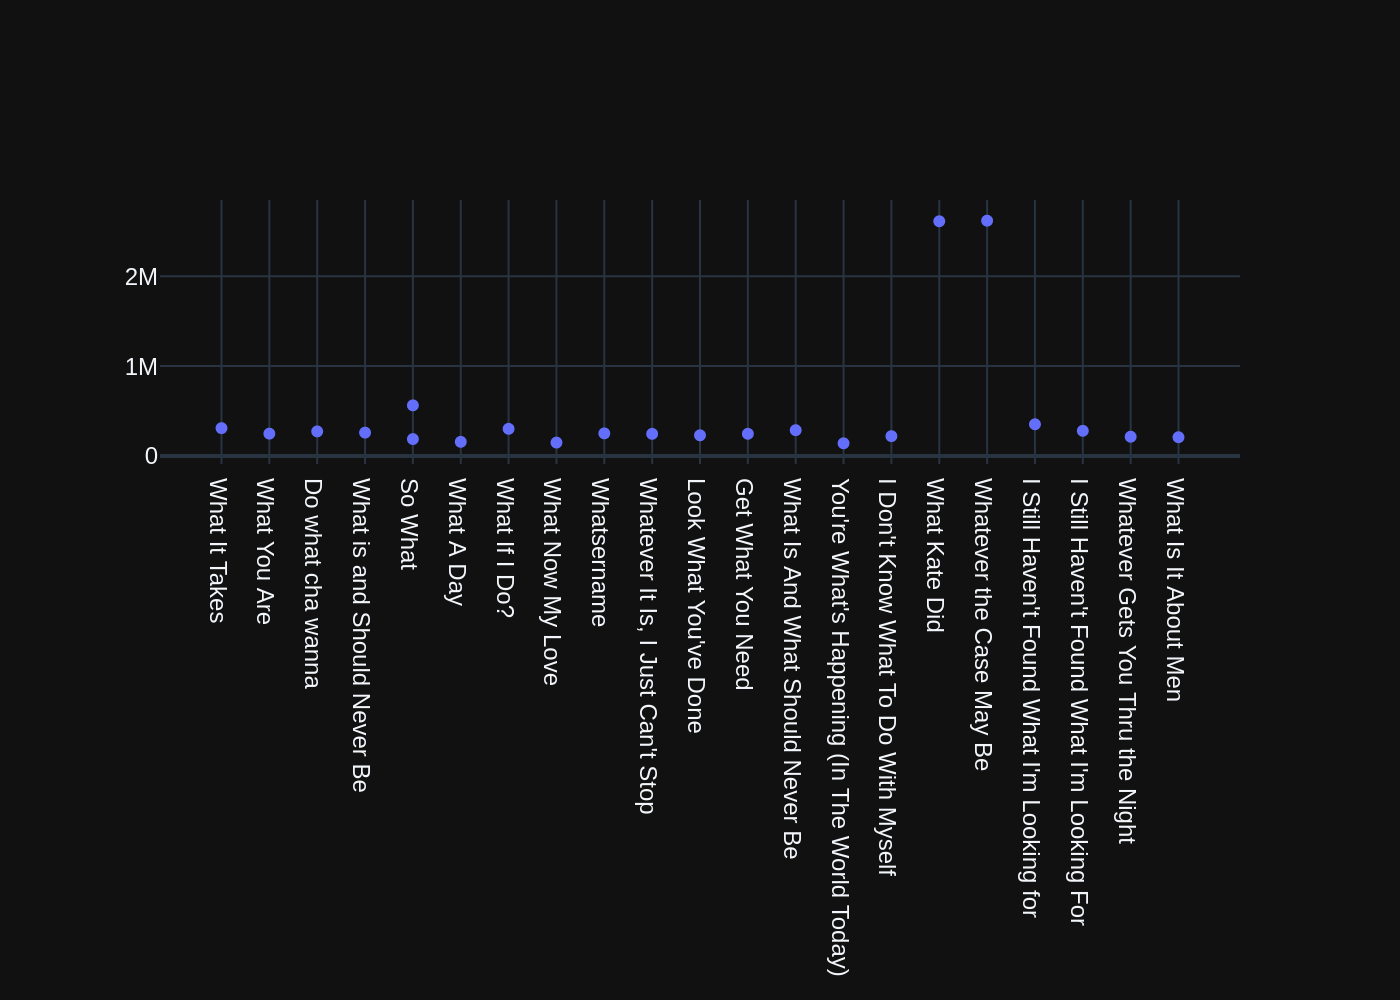

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 8:  Get the total number of invoices for each customer


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT CustomerId, COUNT(*) AS TotalInvoices
FROM invoices
GROUP BY CustomerId

,CustomerId,TotalInvoices
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get the total number of invoices for each customer'\n\nThe DataFrame was produced using this query:  SELECT CustomerId, COUNT(*) AS TotalInvoices\nFROM invoices\nGROUP BY CustomerId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId       int64\nTotalInvoices    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10

import plotly.graph_objects as go
import pandas as pd

if len(df) == 1:
    fig = go.Figure(go.Indicator(mode="number", value=df['TotalInvoices'].iloc[0]))
else:
    fig = go.Figure(data=[go.Bar(x=df['CustomerId'], y=df['TotalInvoices'])])

fig.update_layout(title='Total Number of Invoices for Each Customer', xaxis_title='Customer Id', yaxis_title='Total Invoices')

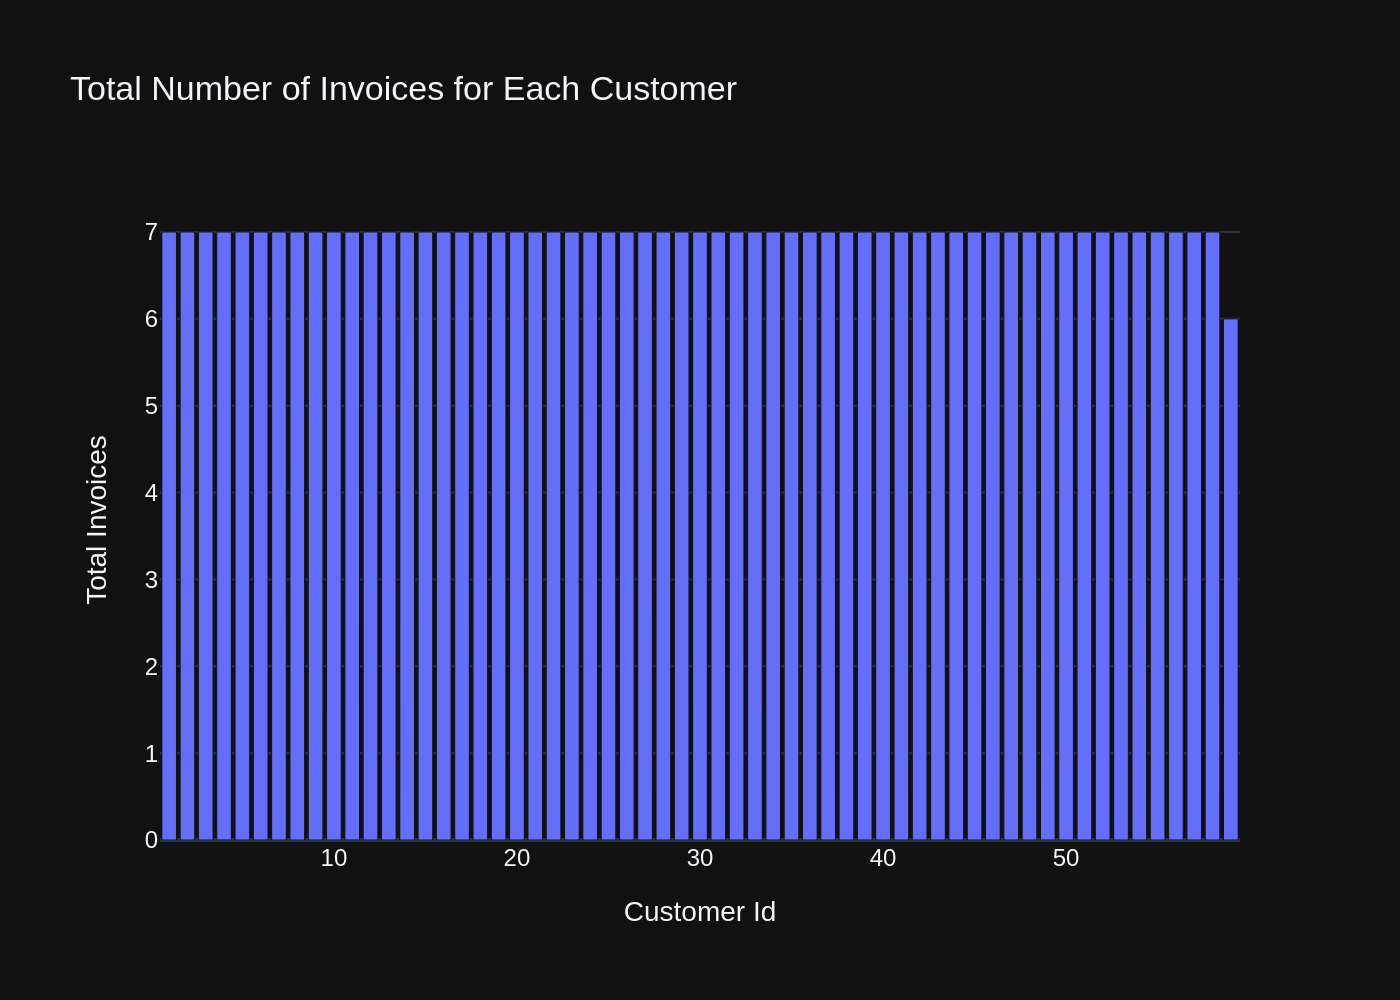

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 9:  Find the total number of invoices per country


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\

SELECT BillingCountry, COUNT(*) AS TotalInvoices
FROM invoices
GROUP BY BillingCountry

,BillingCountry,TotalInvoices
0,Argentina,7
1,Australia,7
2,Austria,7
3,Belgium,7
4,Brazil,35
5,Canada,56
6,Chile,7
7,Czech Republic,14
8,Denmark,7
9,Finland,7



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the total number of invoices per country'\n\nThe DataFrame was produced using this query:  SELECT BillingCountry, COUNT(*) AS TotalInvoices\nFROM invoices\nGROUP BY BillingCountry\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n BillingCountry    object\nTotalInvoices      int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:latest', 'created_at': '

import plotly.express as px

if df['TotalInvoices'].nunique() == 1:
    fig = px.indicator(value=df['TotalInvoices'].iloc[0], title="Total Invoices")
else:
    fig = px.bar(df, x='BillingCountry', y='TotalInvoices', text='TotalInvoices')
fig.update_layout(title='Total Number of Invoices per Country', xaxis_title='Country', yaxis_title='Total Invoices')

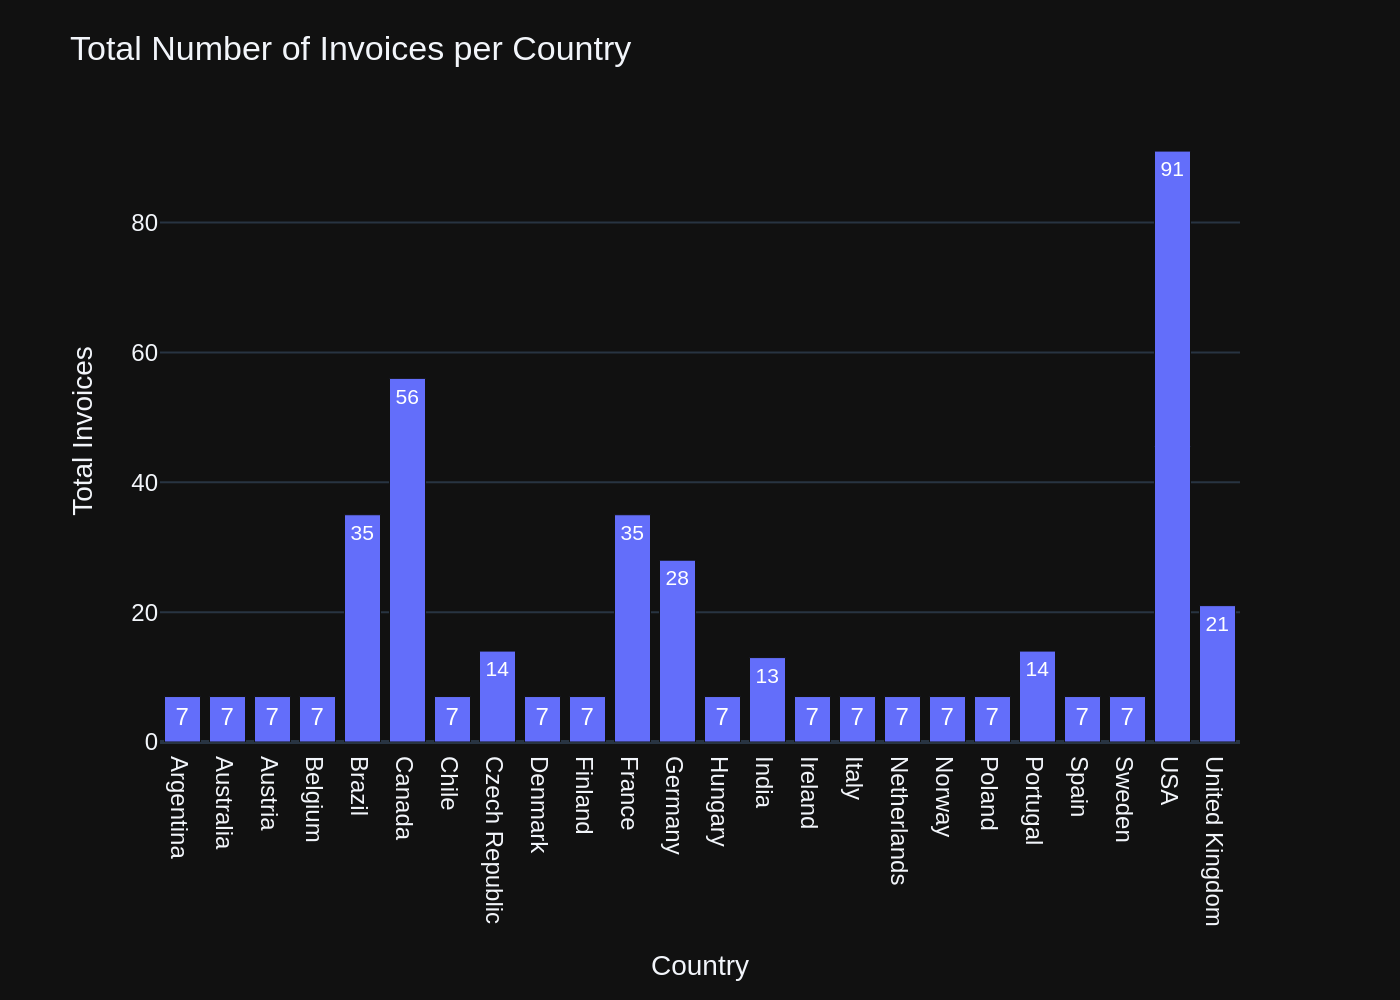

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 10:  List all invoices with a total exceeding $10


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NU

SELECT * FROM invoices WHERE Total > 10

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
...,...,...,...,...,...,...,...,...,...
59,383,10,2013-08-12 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,13.86
60,390,48,2013-09-12 00:00:00,Lijnbaansgracht 120bg,Amsterdam,VV,Netherlands,1016,13.86
61,397,27,2013-10-13 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,13.86
62,404,6,2013-11-13 00:00:00,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all invoices with a total exceeding $10'\n\nThe DataFrame was produced using this query:  SELECT * FROM invoices WHERE Total > 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId              int64\nCustomerId             int64\nInvoiceDate           object\nBillingAddress        object\nBillingCity           object\nBillingState          object\nBillingCountry        object\nBillingPostalCode     object\nTotal                float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicat

import plotly.graph_objects as go
import pandas as pd

if df.shape[0] == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['Total'].values[0],
        title={"text": "Total Invoice Amount"}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['InvoiceDate'], y=df['Total'])])

fig.update_layout(title='Invoices with Total Exceeding $10')

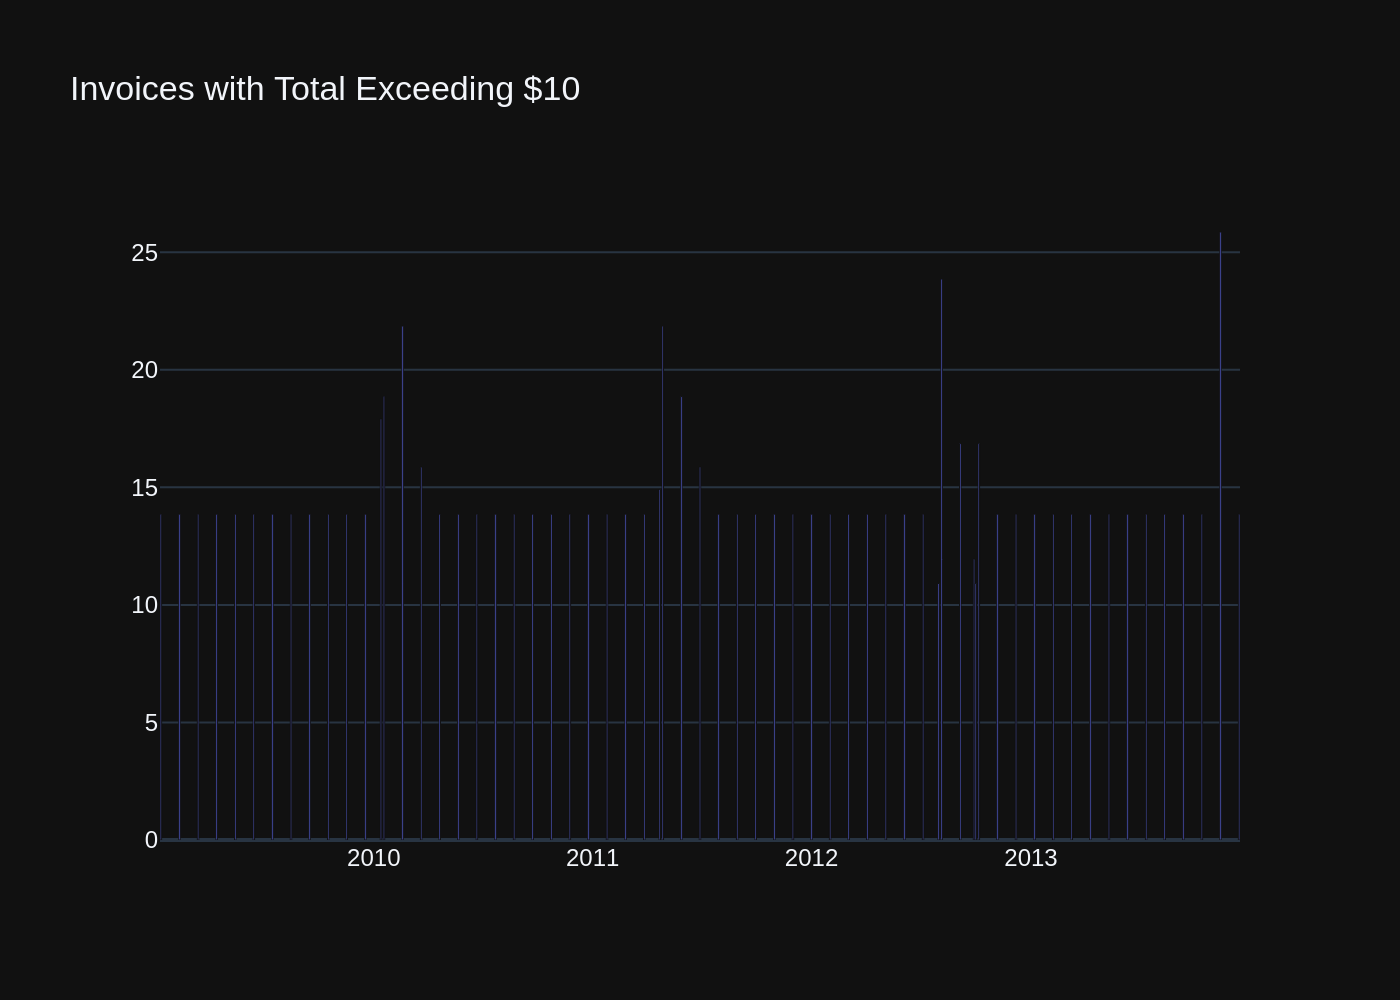

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 11:  Find all invoices since 2010 and the total amount invoiced:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId

SELECT InvoiceId, CustomerId, InvoiceDate, Total
FROM invoices
WHERE InvoiceDate >= '2010-01-01'

,InvoiceId,CustomerId,InvoiceDate,Total
0,84,43,2010-01-08 00:00:00,1.98
1,85,45,2010-01-08 00:00:00,1.98
2,86,47,2010-01-09 00:00:00,3.96
3,87,51,2010-01-10 00:00:00,6.94
4,88,57,2010-01-13 00:00:00,17.91
...,...,...,...,...
324,408,25,2013-12-05 00:00:00,3.96
325,409,29,2013-12-06 00:00:00,5.94
326,410,35,2013-12-09 00:00:00,8.91
327,411,44,2013-12-14 00:00:00,13.86



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find all invoices since 2010 and the total amount invoiced:'\n\nThe DataFrame was produced using this query: SELECT InvoiceId, CustomerId, InvoiceDate, Total\nFROM invoices\nWHERE InvoiceDate >= '2010-01-01'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n InvoiceId        int64\nCustomerId       int64\nInvoiceDate     object\nTotal          float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollam

import plotly.graph_objects as go
import pandas as pd

# Check if the DataFrame has more than one row
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=df['Total'].values[0],
        title={"text": "Total Amount Invoiced"}
    ))
else:
    fig = go.Figure(data=[go.Bar(x=df['InvoiceDate'], y=df['Total'])])

fig.update_layout(title='Invoices Since 2010', xaxis_title='Invoice Date', yaxis_title='Total Amount')

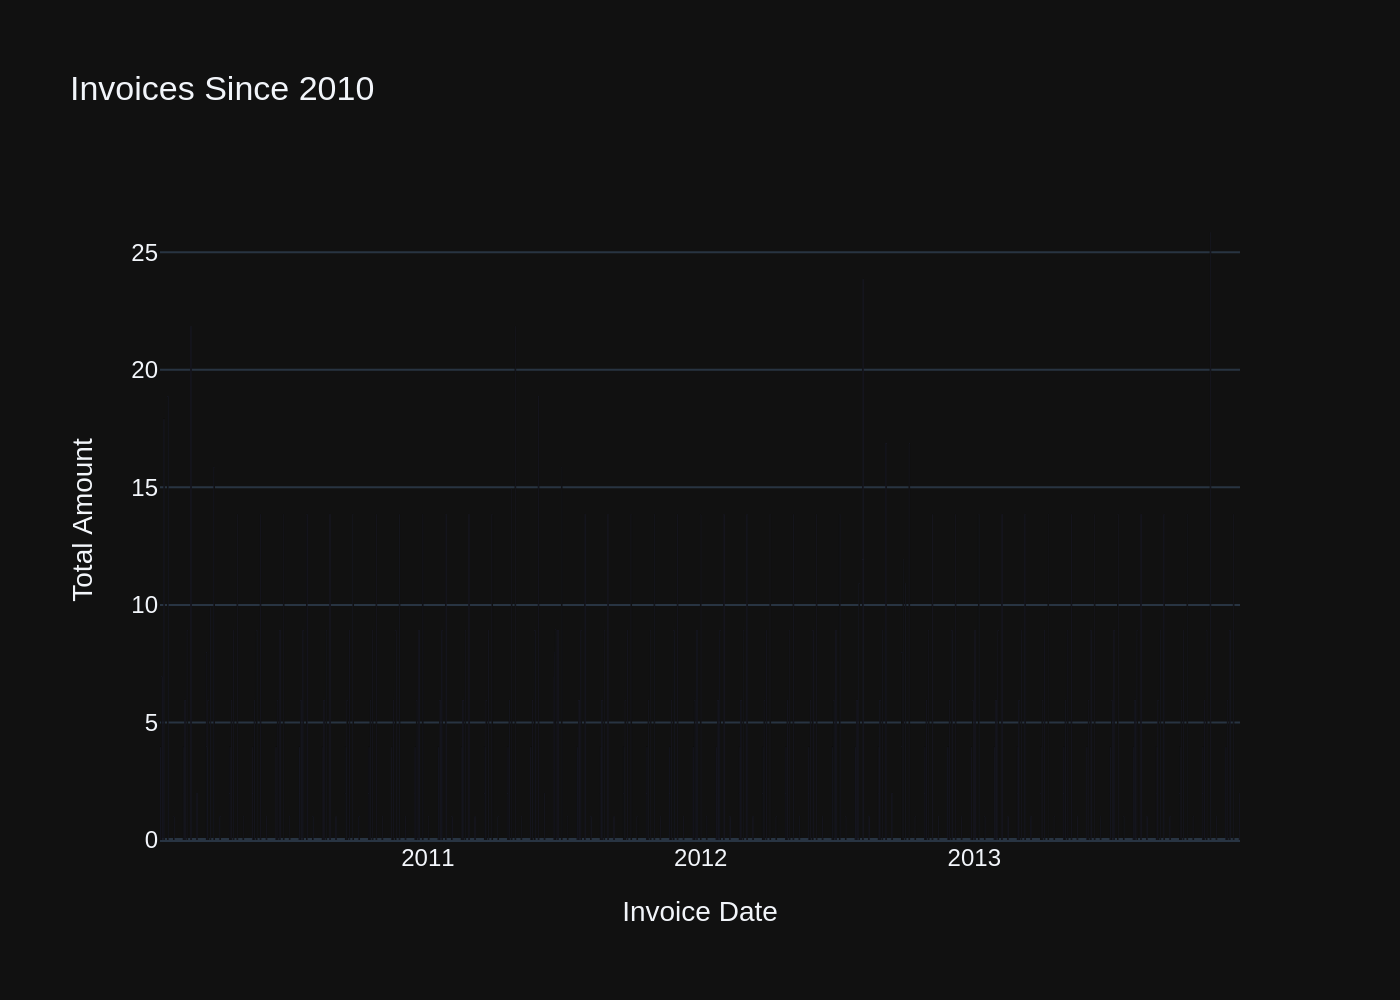

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 12:  List all employees and their reporting manager's name (if any):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON "employees" (ReportsTo)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    FirstName NVARCHAR(20)  NOT NULL,\r\n    Title NVARCHAR(30),\r\n    ReportsTo INTEGER,\r\n    BirthDate DATETIME,\r\n    HireDate DATETIME,\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60),\r\n    FOREIGN KEY (ReportsTo) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE 

SELECT e.FirstName, e.LastName, m.FirstName AS ManagerFirstName, m.LastName AS ManagerLastName
FROM employees e
LEFT JOIN employees m ON e.ReportsTo = m.EmployeeId

,FirstName,LastName,ManagerFirstName,ManagerLastName
0,Andrew,Adams,None,None
1,Nancy,Edwards,Andrew,Adams
2,Jane,Peacock,Nancy,Edwards
3,Margaret,Park,Nancy,Edwards
4,Steve,Johnson,Nancy,Edwards
5,Michael,Mitchell,Andrew,Adams
6,Robert,King,Michael,Mitchell
7,Laura,Callahan,Michael,Mitchell



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all employees and their reporting manager's name (if any):'\n\nThe DataFrame was produced using this query: SELECT e.FirstName, e.LastName, m.FirstName AS ManagerFirstName, m.LastName AS ManagerLastName\nFROM employees e\nLEFT JOIN employees m ON e.ReportsTo = m.EmployeeId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n FirstName           object\nLastName            object\nManagerFirstName    object\nManagerLastName     object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond wi

import plotly.graph_objects as go
import pandas as pd

# Assuming df is your DataFrame
if len(df) == 1:
    fig = go.Figure(go.Indicator(
        mode="number",
        value=len(df),
        title={"text": f"{df['FirstName'].iloc[0]} {df['LastName'].iloc[0]}'s Manager" if pd.notna(df['ManagerFirstName'].iloc[0]) else "No Manager", "font": {"size": 24}},
        number={"prefix": "", "suffix": ""}
    ))
else:
    fig = go.Figure(data=[go.Table(header=dict(values=['First Name', 'Last Name', 'Manager First Name', 'Manager Last Name']),
                                  cells=dict(values=[df['FirstName'], df['LastName'], df['ManagerFirstName'], df['ManagerLastName']))])

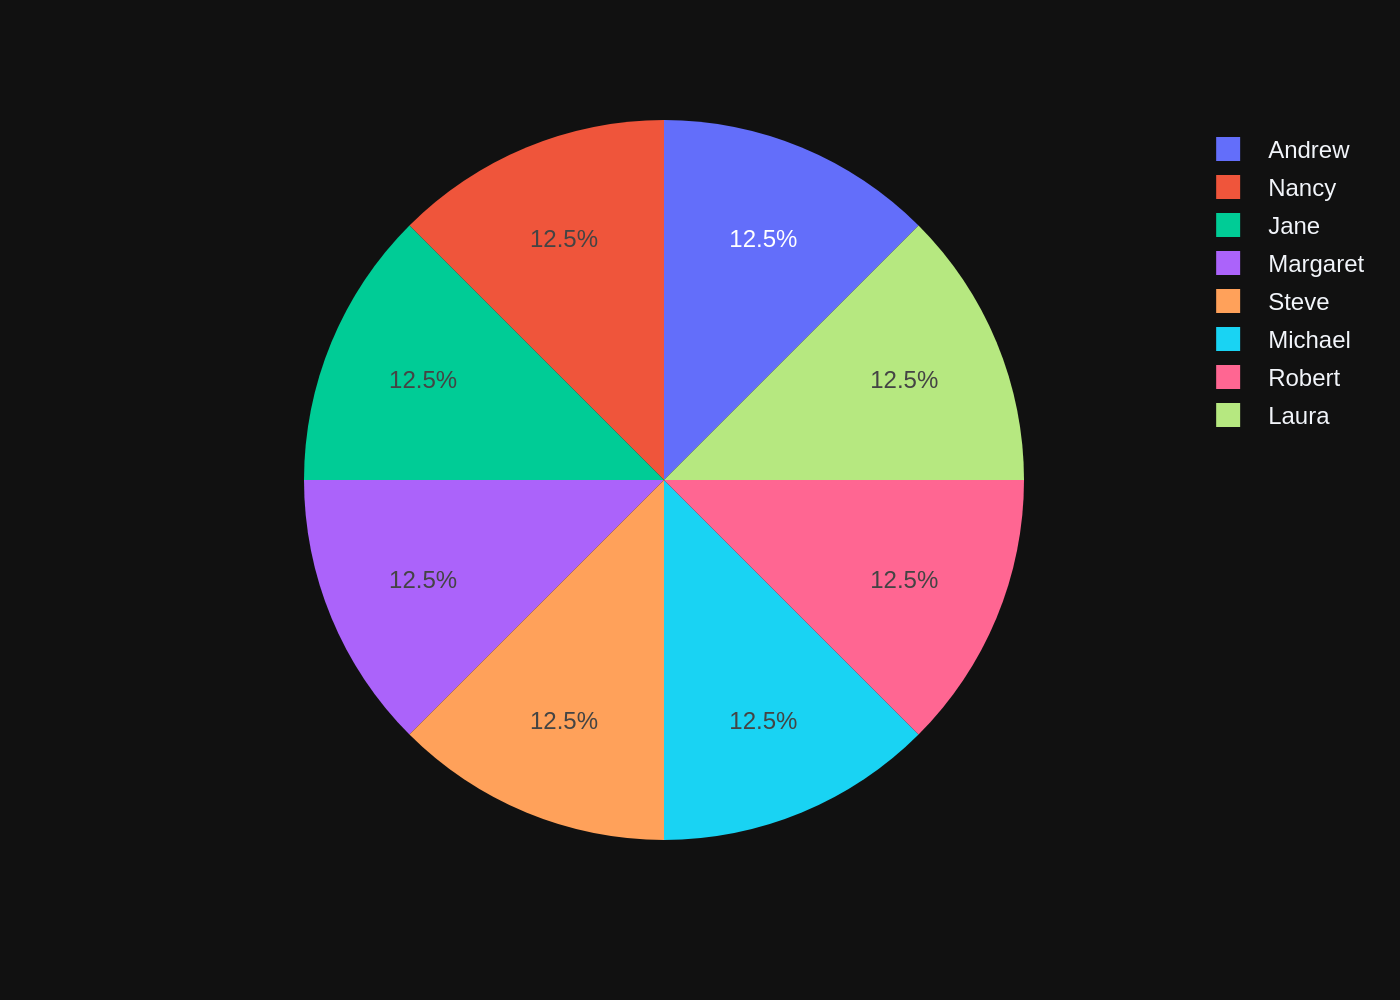

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 13:   Get the average invoice total for each customer:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_

SELECT CustomerId, AVG(Total) AS AverageInvoiceTotal
FROM invoices
GROUP BY CustomerId

,CustomerId,AverageInvoiceTotal
0,1,5.660000
1,2,5.374286
2,3,5.660000
3,4,5.660000
4,5,5.802857
5,6,7.088571
6,7,6.088571
7,8,5.374286
8,9,5.374286
9,10,5.374286



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' Get the average invoice total for each customer:'\n\nThe DataFrame was produced using this query:  SELECT CustomerId, AVG(Total) AS AverageInvoiceTotal\nFROM invoices\nGROUP BY CustomerId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId               int64\nAverageInvoiceTotal    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:latest',

import plotly.express as px

fig = px.line(df, x='CustomerId', y='AverageInvoiceTotal', title='Average Invoice Total for Each Customer')

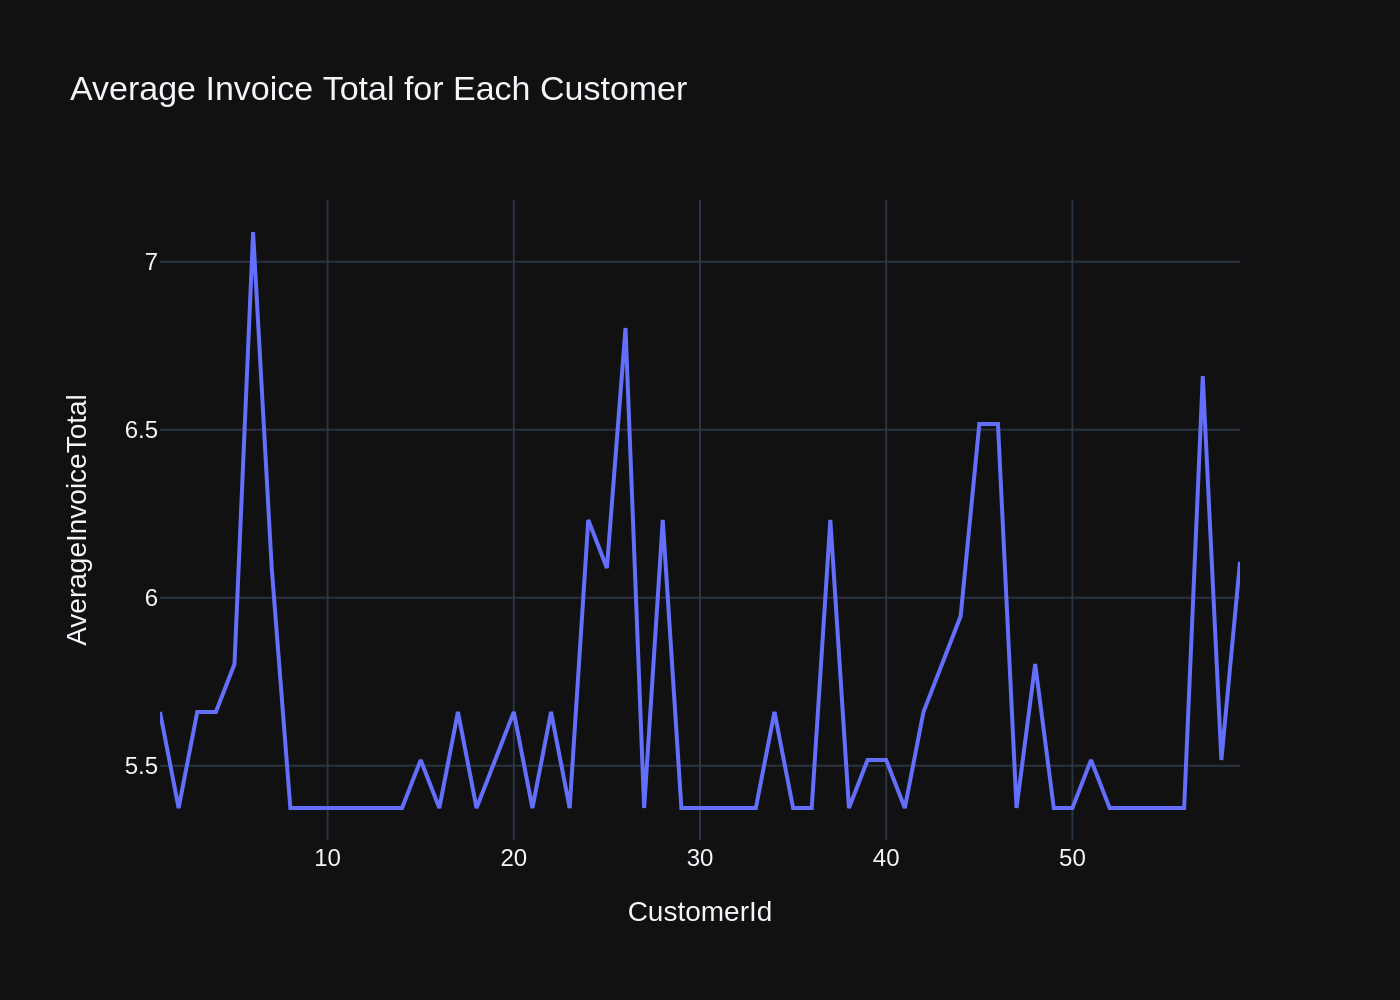

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 14:  Find the top 5 most expensive tracks (based on unit price):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACT

SELECT Name, UnitPrice
FROM tracks
ORDER BY UnitPrice DESC
LIMIT 5

,Name,UnitPrice
0,Battlestar Galactica: The Story So Far,1.99
1,Occupation / Precipice,1.99
2,"Exodus, Pt. 1",1.99
3,"Exodus, Pt. 2",1.99
4,Collaborators,1.99



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the top 5 most expensive tracks (based on unit price):'\n\nThe DataFrame was produced using this query:  SELECT Name, UnitPrice\nFROM tracks\nORDER BY UnitPrice DESC\nLIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Name          object\nUnitPrice    float64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10-12T17

import plotly.express as px

if df['UnitPrice'].nunique() == 1:
    fig = px.indicator(value=df['UnitPrice'][0], title='Top 5 Most Expensive Tracks by Unit Price')
else:
    fig = px.bar(df, x='Name', y='UnitPrice', text='UnitPrice', title='Top 5 Most Expensive Tracks by Unit Price')

fig.update_xaxes(title_text='Track Name')
fig.update_yaxes(title_text='Unit Price')

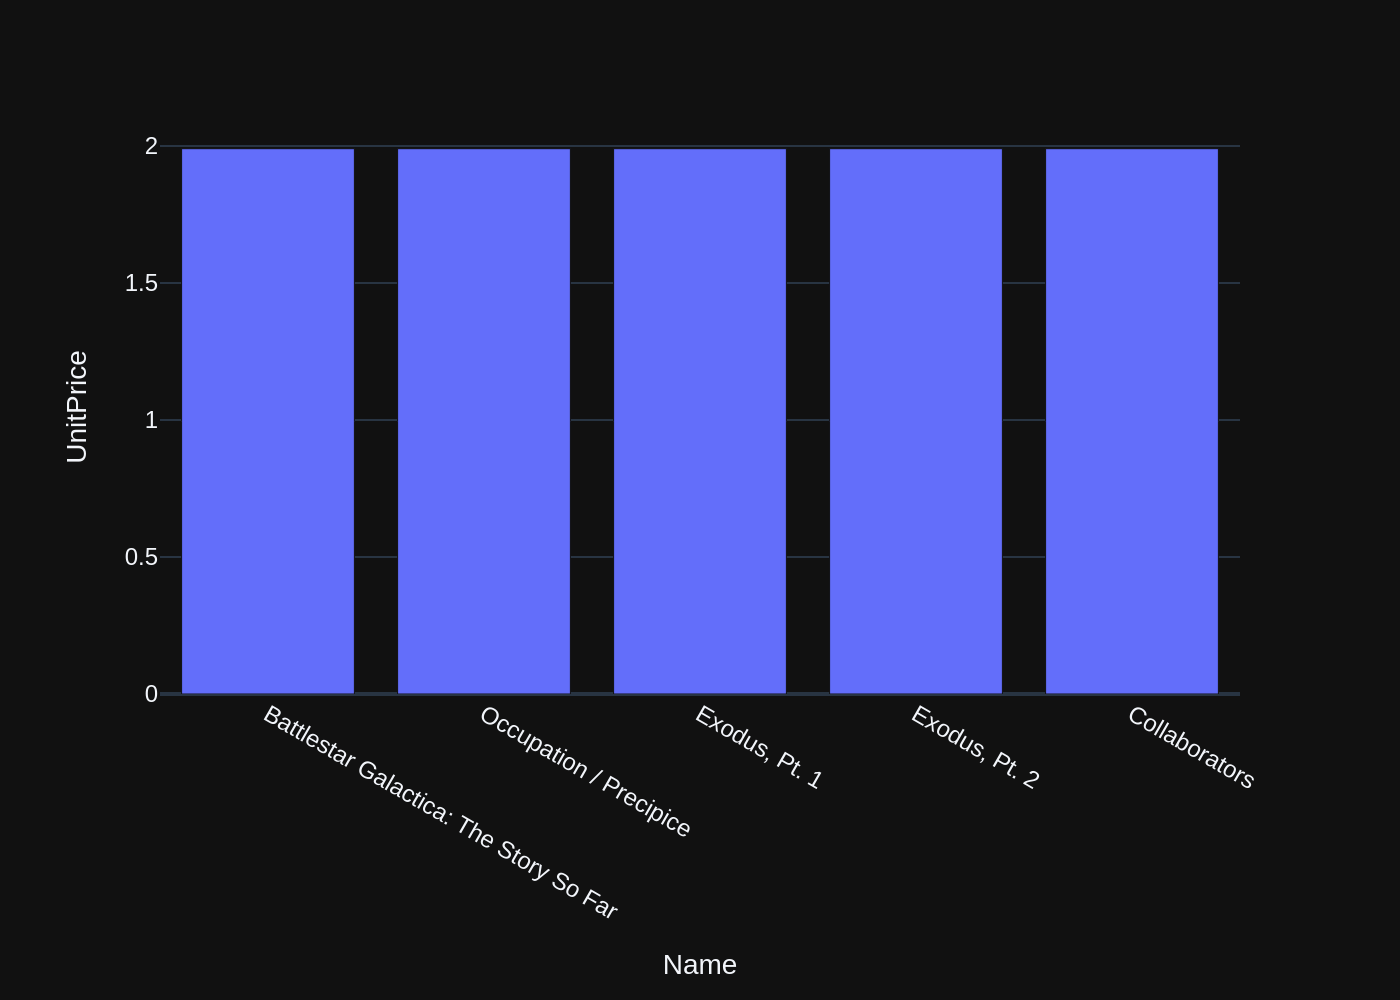

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 15:  List all genres and the number of tracks in each genre:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION 

SELECT g.Name AS GenreName, COUNT(t.TrackId) AS NumberOfTracks
FROM genres g
LEFT JOIN tracks t ON g.GenreId = t.GenreId
GROUP BY g.GenreId

,GenreName,NumberOfTracks
0,Rock,1297
1,Jazz,130
2,Metal,374
3,Alternative & Punk,332
4,Rock And Roll,12
5,Blues,81
6,Latin,579
7,Reggae,58
8,Pop,48
9,Soundtrack,43



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all genres and the number of tracks in each genre:'\n\nThe DataFrame was produced using this query:  \nSELECT g.Name AS GenreName, COUNT(t.TrackId) AS NumberOfTracks\nFROM genres g\nLEFT JOIN tracks t ON g.GenreId = t.GenreId\nGROUP BY g.GenreId\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n GenreName         object\nNumberOfTracks     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

df = pd.DataFrame({
    'GenreName': ['Rock', 'Rock', 'Rock', 'Jazz', 'Jazz'],
    'NumberOfTracks': [10, 10, 10, 5, 5]
})

fig = make_subplots(rows=1, cols=1)

if df['NumberOfTracks'].nunique() == 1:
    fig.add_trace(go.Indicator(
        mode="number",
        value=df['NumberOfTracks'].iloc[0],
        title={"text": "Number of Tracks per Genre"}
    ))
else:
    fig.add_bar(x=df['GenreName'], y=df['NumberOfTracks'], name='Number of Tracks')

fig.update_layout(title_text="Genres and Number of Tracks")

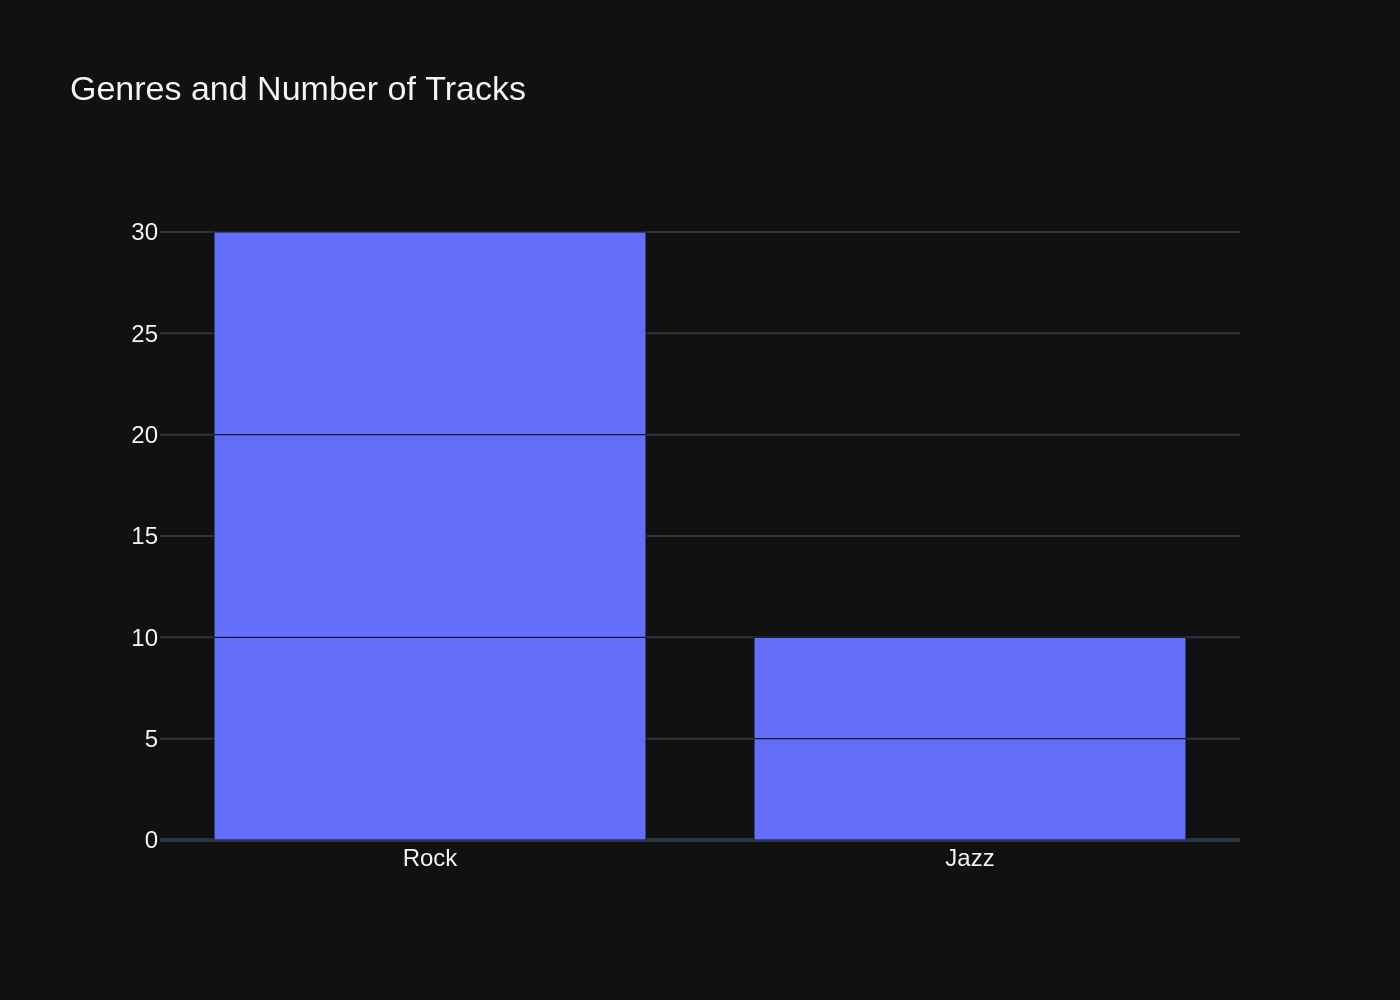

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 16:  Get all genres that do not have any tracks associated with them:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REF

SELECT g.*
FROM genres g
LEFT JOIN tracks t ON g.GenreId = t.GenreId
WHERE t.TrackId IS NULL

,GenreId,Name


Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 17:  List all customers who have not placed any orders:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(

SELECT c.*
FROM customers c
LEFT JOIN invoices i ON c.CustomerId = i.CustomerId
WHERE i.InvoiceId IS NULL

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId


Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FORE

SELECT a.ArtistId, a.Name AS ArtistName, COUNT(t.TrackId) AS NumberOfTracks
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
GROUP BY a.ArtistId
ORDER BY NumberOfTracks DESC
LIMIT 10

,ArtistId,ArtistName,NumberOfTracks
0,90,Iron Maiden,213
1,150,U2,135
2,22,Led Zeppelin,114
3,50,Metallica,112
4,58,Deep Purple,92
5,149,Lost,92
6,118,Pearl Jam,67
7,100,Lenny Kravitz,57
8,21,Various Artists,56
9,156,The Office,53



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: ' \n        Can you find the top 10 most popular artists based on the number of tracks?\n        Hint: There are 3 tables - artists, albums and tracks, \n        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,\n    '\n\nThe DataFrame was produced using this query:  SELECT a.ArtistId, a.Name AS ArtistName, COUNT(t.TrackId) AS NumberOfTracks\nFROM artists a\nJOIN albums al ON a.ArtistId = al.ArtistId\nJOIN tracks t ON al.AlbumId = t.AlbumId\nGROUP BY a.ArtistId\nORDER BY NumberOfTracks DESC\nLIMIT 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n ArtistId           int64\nArtistName        object\nNumberOfTracks     int64\ndtype: object"}, {"r

import plotly.express as px
import pandas as pd

# Check if the DataFrame has more than one row
if len(df) > 1:
    fig = px.bar(df, x='ArtistName', y='NumberOfTracks', text_auto='.2s')
else:
    fig = px.scatter(df, x='ArtistName', y='NumberOfTracks', trendline="ols")

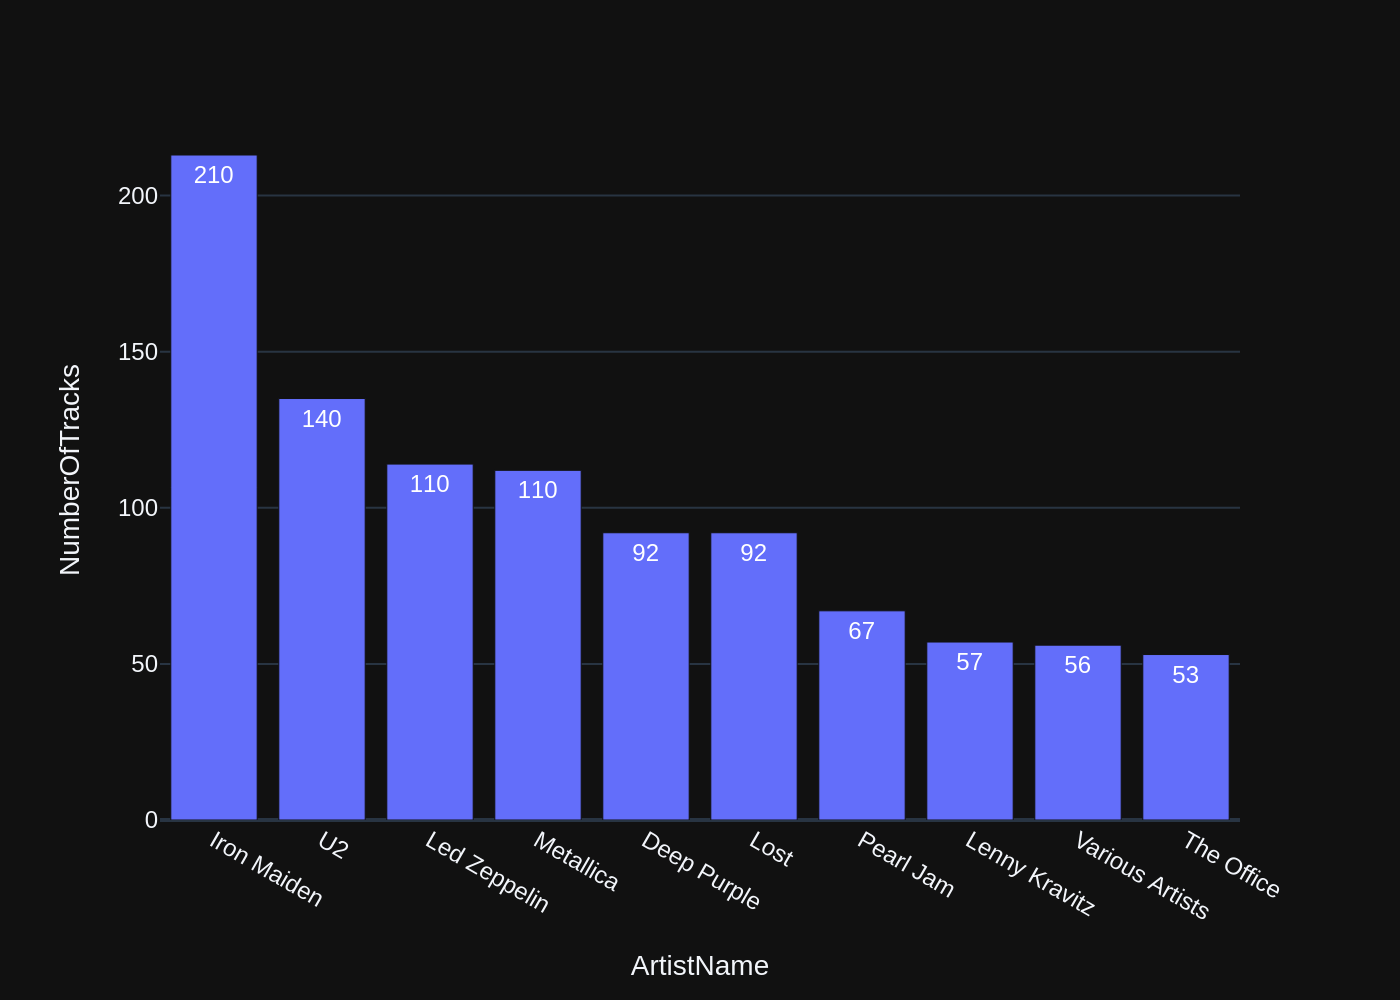

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 19:  List all customers from Canada and their email addresses:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\

SELECT Email, Country
FROM customers
WHERE Country = 'Canada'

,Email,Country
0,ftremblay@gmail.com,Canada
1,mphilips12@shaw.ca,Canada
2,jenniferp@rogers.ca,Canada
3,robbrown@shaw.ca,Canada
4,edfrancis@yachoo.ca,Canada
5,marthasilk@gmail.com,Canada
6,aaronmitchell@yahoo.ca,Canada
7,ellie.sullivan@shaw.ca,Canada



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'List all customers from Canada and their email addresses:'\n\nThe DataFrame was produced using this query:  SELECT Email, Country\nFROM customers\nWHERE Country = 'Canada'\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n Email      object\nCountry    object\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer with any explanations -- just the code."}]

[( Ollama Response )]
{'model': 'deepseek-coder-v2:latest', 'created_at': '2024-10-12T17:29:06.0265446

import plotly.express as px

if df['Email'].nunique() == 1:
    fig = px.indicator(value=len(df), title="Number of Customers from Canada")
else:
    fig = px.bar(df, x='Email', y='Country', text_auto='.2s')

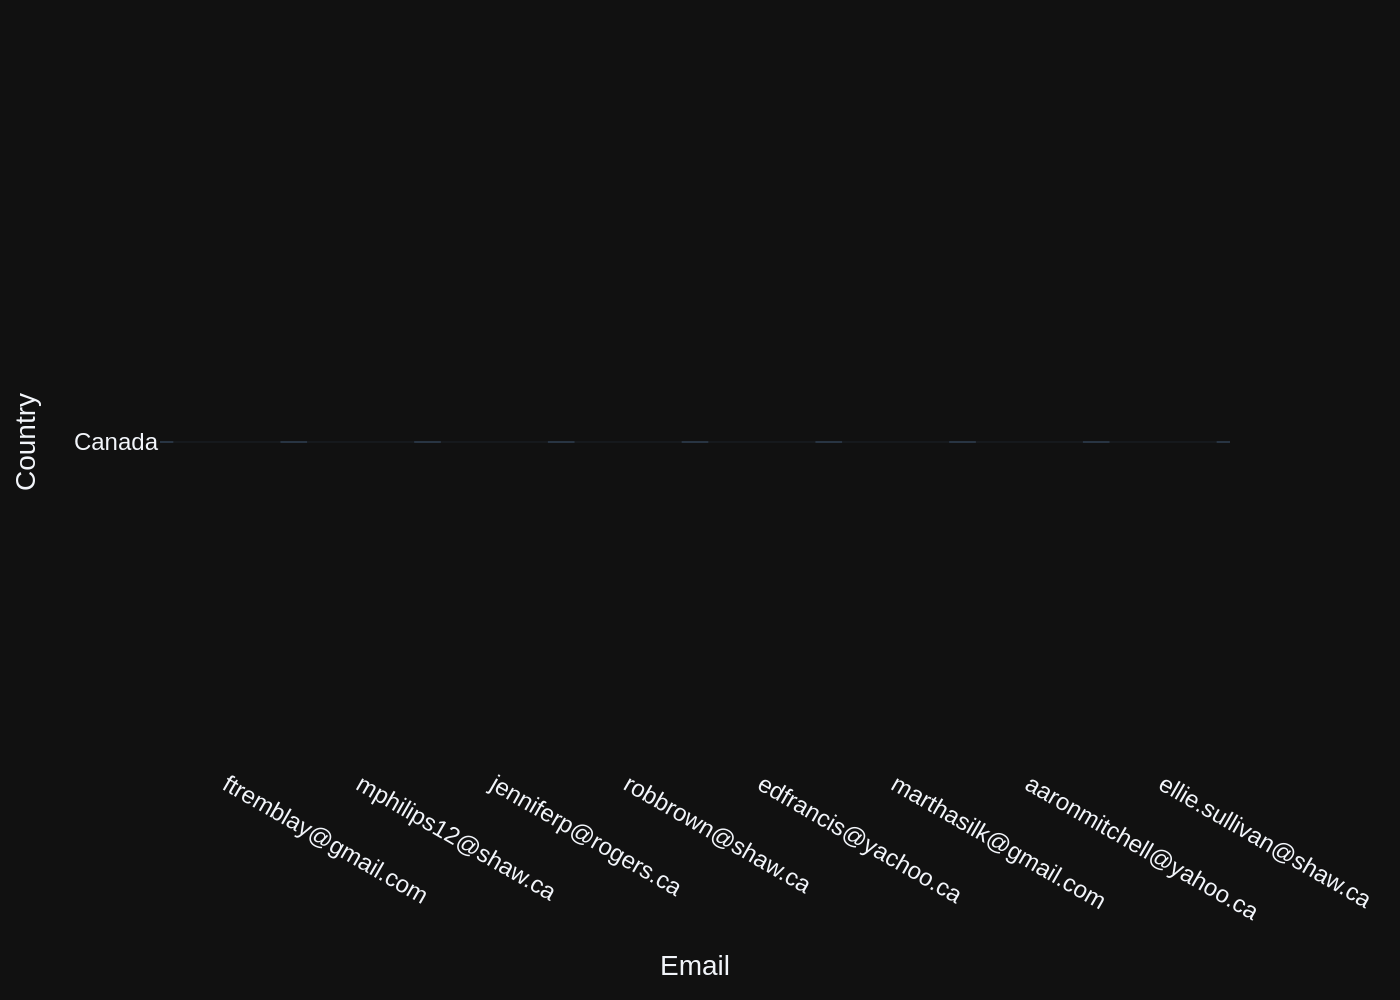

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 20:  Find the customer with the most invoices 


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r

SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS NumberOfInvoices
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY NumberOfInvoices DESC
LIMIT 1

,CustomerId,FirstName,LastName,NumberOfInvoices
0,1,Luís,Gonçalves,7



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer with the most invoices '\n\nThe DataFrame was produced using this query:  SELECT c.CustomerId, c.FirstName, c.LastName, COUNT(i.InvoiceId) AS NumberOfInvoices\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId\nORDER BY NumberOfInvoices DESC\nLIMIT 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId           int64\nFirstName           object\nLastName            object\nNumberOfInvoices     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, 

import plotly.express as px

if len(df) == 1:
    fig = px.indicator(
        title="Number of Invoices",
        value=df['NumberOfInvoices'].iloc[0],
        gauge={'axis': {'visible': False}},
        template='plotly_dark'
    )
else:
    fig = px.bar(df, x='CustomerId', y='NumberOfInvoices', text='NumberOfInvoices')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(title='Number of Invoices by Customer')

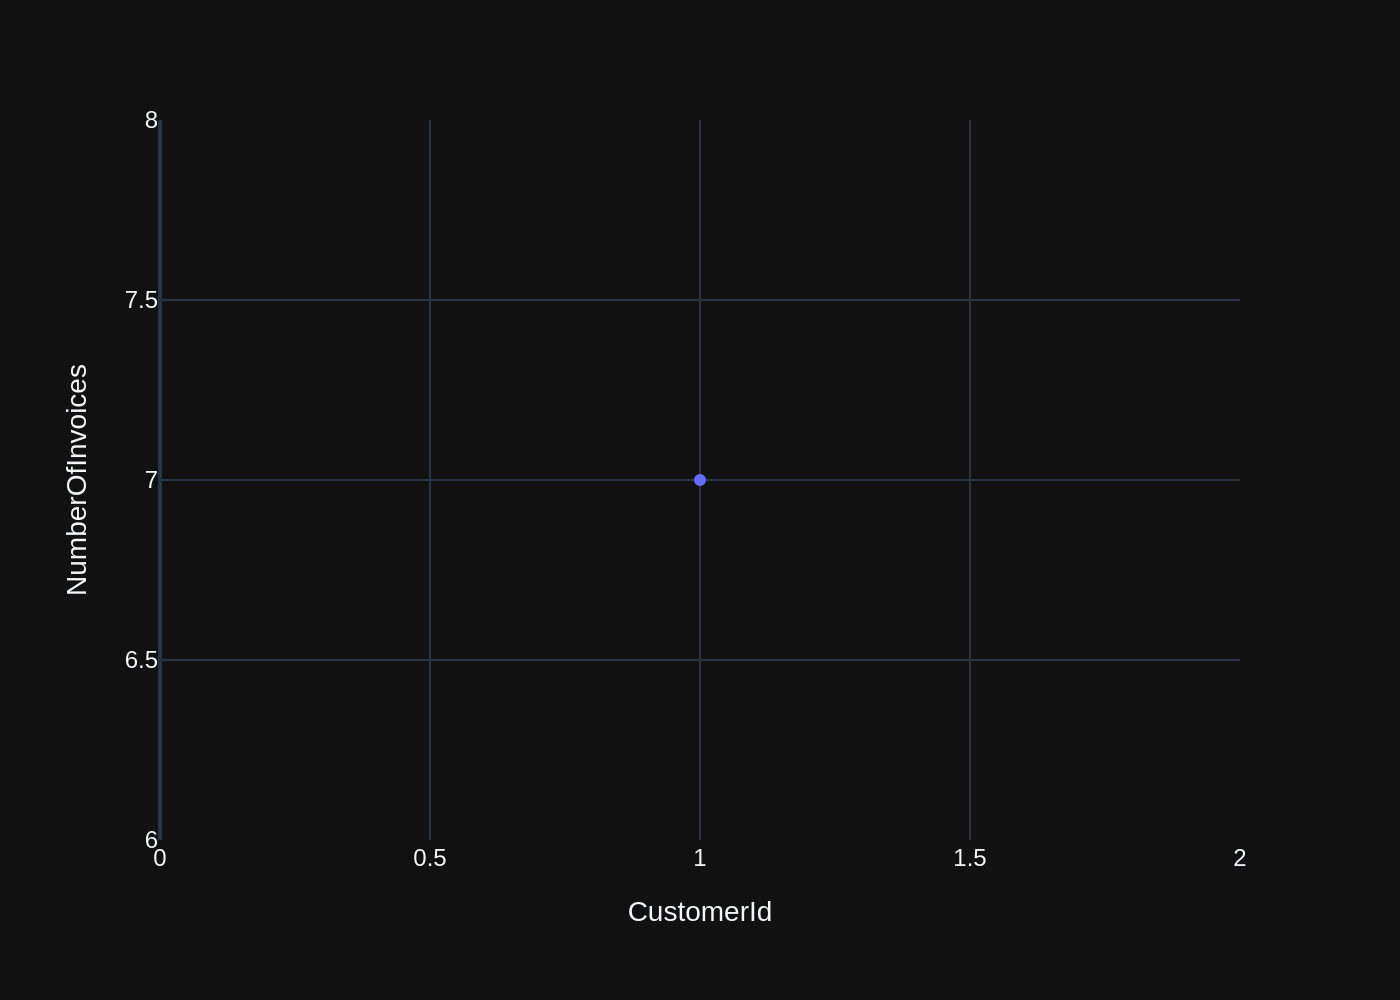

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 21:  Find the customer who bought the most albums in total quantity (across all invoices):


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbumQuantity DESC
LIMIT 1

,CustomerId,FirstName,LastName,TotalAlbumQuantity
0,1,Luís,Gonçalves,38



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Find the customer who bought the most albums in total quantity (across all invoices):'\n\nThe DataFrame was produced using this query:   SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nJOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId\nGROUP BY c.CustomerId\nORDER BY TotalAlbumQuantity DESC\nLIMIT 1\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId             int64\nFirstName             object\nLastName              object\nTotalAlbumQuantity     int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the da

import plotly.express as px
import pandas as pd

# Check if the DataFrame has more than one row
if len(df) > 1:
    fig = px.bar(df, x='CustomerId', y='TotalAlbumQuantity', text='TotalAlbumQuantity')
else:
    fig = px.indicator(title="Top Customer by Total Album Quantity", value=df['TotalAlbumQuantity'].iloc[0], domain={'y': [0, 1]})

fig.update_layout(title='Customer with the Most Albums Purchased', xaxis_title='Customer ID', yaxis_title='Total Album Quantity')

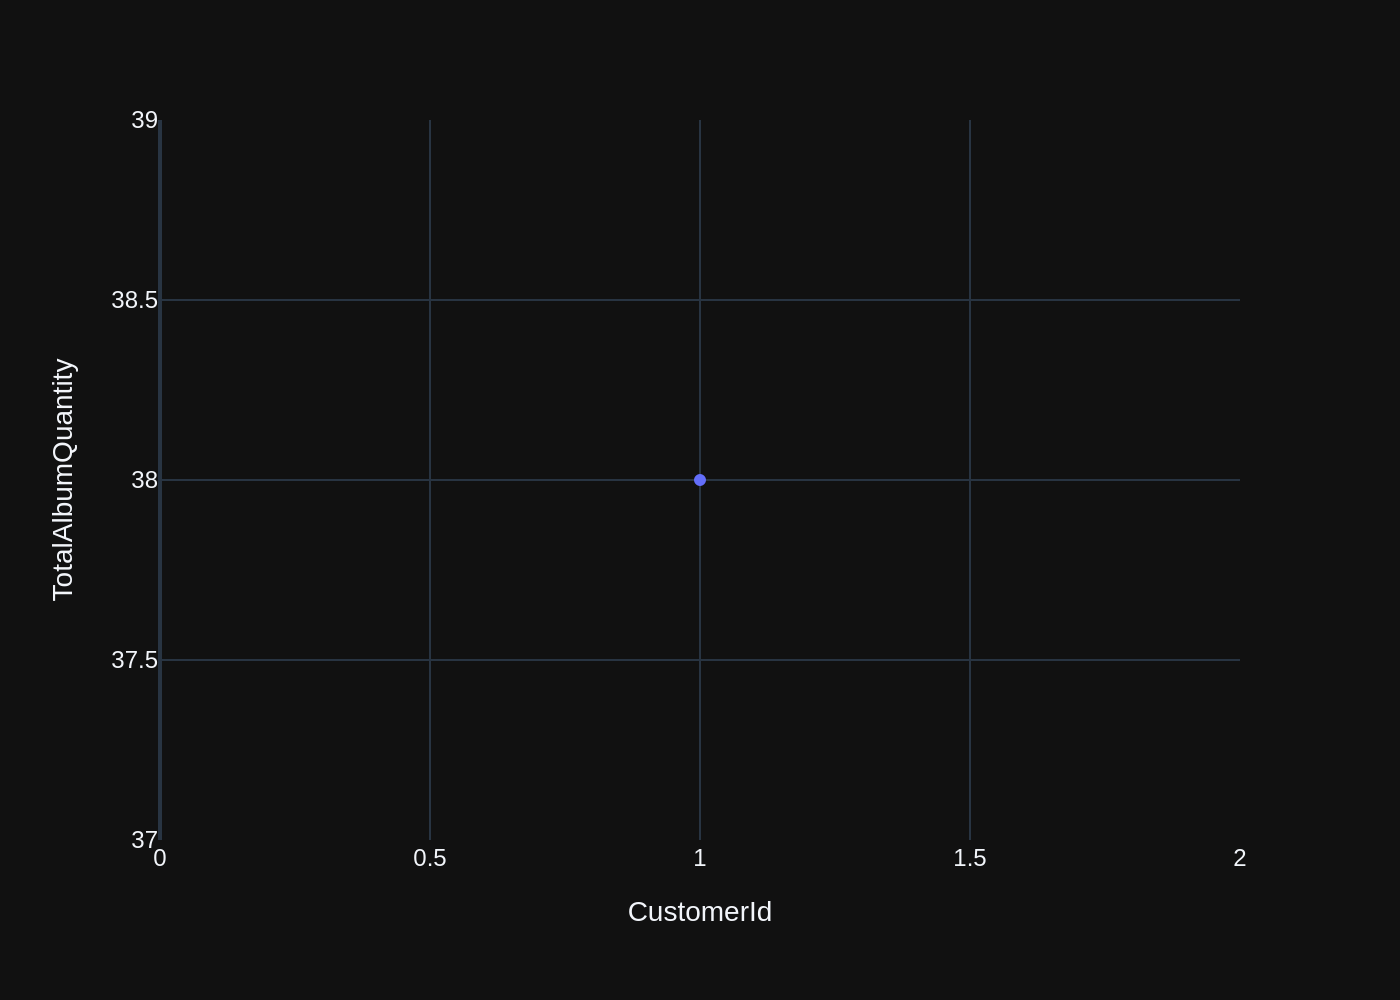

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCR

SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbumQuantity DESC
LIMIT 5

,CustomerId,FirstName,LastName,TotalAlbumQuantity
0,1,Luís,Gonçalves,38
1,2,Leonie,Köhler,38
2,3,François,Tremblay,38
3,4,Bjørn,Hansen,38
4,5,František,Wichterlová,38



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: '      \n        Find the top 5 customers who bought the most albums in total quantity (across all invoices):\n        Hint: album quantity is found in invoice_items, \n    '\n\nThe DataFrame was produced using this query:   SELECT c.CustomerId, c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbumQuantity\nFROM customers c\nJOIN invoices i ON c.CustomerId = i.CustomerId\nJOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId\nGROUP BY c.CustomerId\nORDER BY TotalAlbumQuantity DESC\nLIMIT 5\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n CustomerId             int64\nFirstName             object\nLastName              object\nTotalAlbumQuantity     int64\ndtype: object"}, {"role": "us

import plotly.express as px
import numpy as np

if len(df) == 1:
    fig = px.indicator(title="Top Customers by Total Album Quantity", value=df['TotalAlbumQuantity'].values[0], domain={"x": [0, 1], "y": [0, 1]})
else:
    fig = px.bar(df, x='CustomerId', y='TotalAlbumQuantity', text_auto='.2s')

fig.update_layout(title="Top 5 Customers by Total Album Quantity", xaxis_title="Customer ID", yaxis_title="Total Album Quantity")

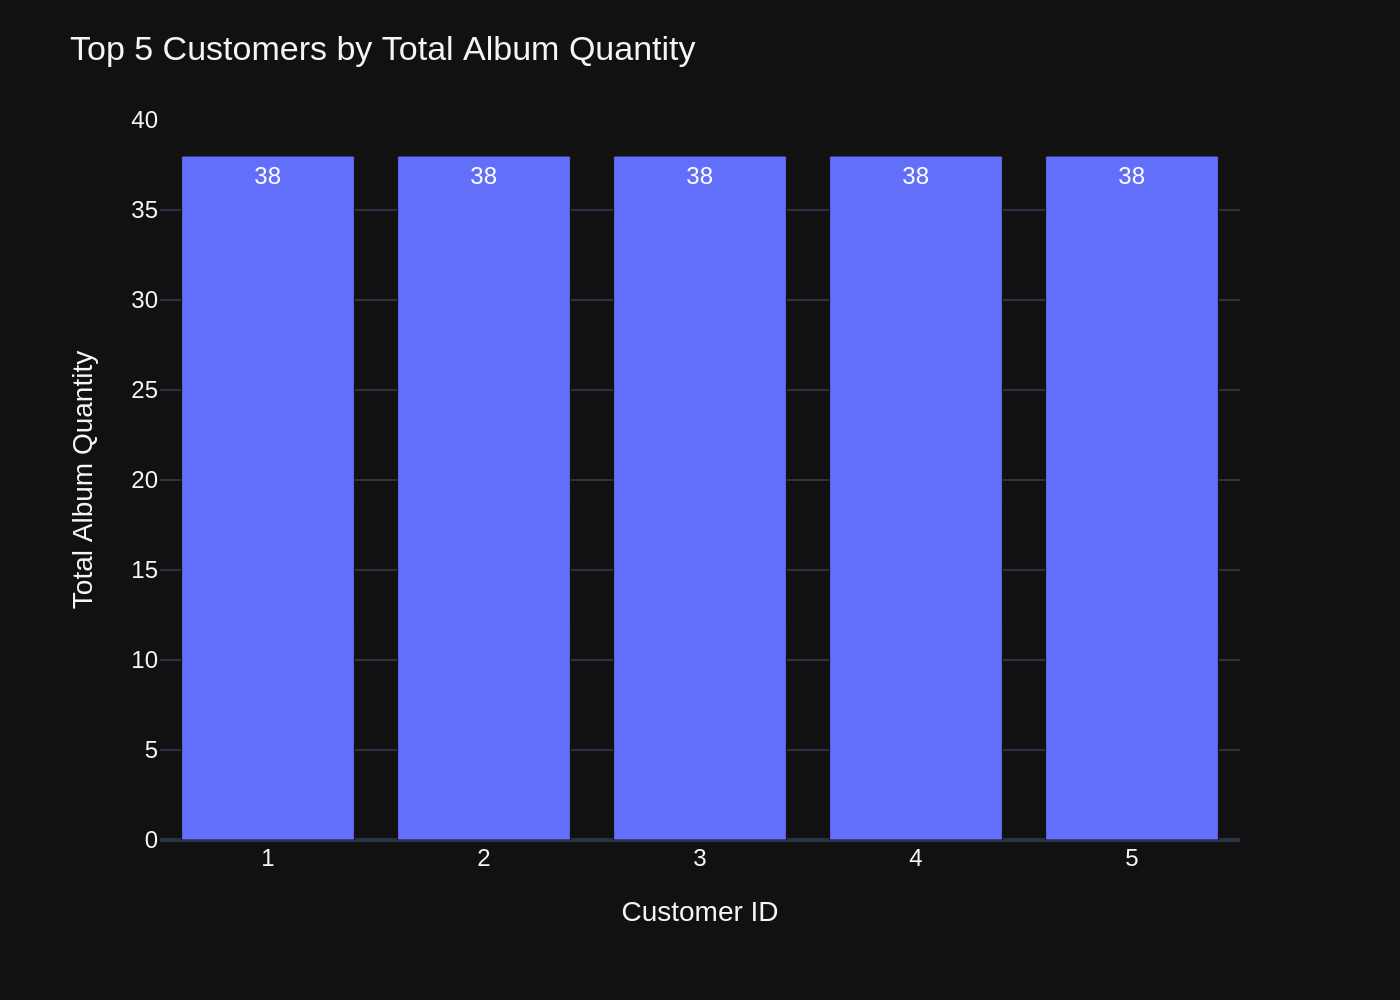

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABL

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[ERROR-SQL] Failed to generate SQL for prompt:   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
     with the following exception: 
an unknown error was encountered while running the model 
*** RETRY 1 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[ERROR-SQL] Failed to generate SQL for prompt: 
        For the question   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    , 
        the generated SQL statement None results in the following exception [ERROR-SQL] Failed to generate SQL for prompt:   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
     with the following exception: 
an unknown error was encountered while running the model  .
        Please fix the error and re-generate the SQL
         with the following exception: 
an unknown error was encountered while running the model 
*** RETRY 2 ***

[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


[ERROR-SQL] Failed to generate SQL for prompt: 
        For the question 
        For the question   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    , 
        the generated SQL statement None results in the following exception [ERROR-SQL] Failed to generate SQL for prompt:   
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
     with the following exception: 
an unknown error was encountered while running the model  .
        Please fix the error and re-generate the SQL
        , 
        the generated SQL statement None results in the following exception [ERROR-SQL] Failed to generate SQL for prompt: 
        For the question   
         Find the top 5 customers who spent the most money overall,  
   

SELECT p.PlaylistId, COUNT(pt.TrackId) AS TrackCount
FROM playlists p
JOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId
GROUP BY p.PlaylistId
HAVING TrackCount >= 10

,PlaylistId,TrackCount
0,1,3290
1,3,213
2,5,1477
3,8,3290
4,10,213
5,11,39
6,12,75
7,13,25
8,14,25
9,15,25



[Ollama parameters]
model=deepseek-coder-v2:latest,
options={},
keep_alive=None

[( Prompt Content )]
[{"role": "system", "content": "The following is a pandas DataFrame that contains the results of the query that answers the question the user asked: 'Get all playlists containing at least 10 tracks and the total duration of those tracks:'\n\nThe DataFrame was produced using this query: SELECT p.PlaylistId, COUNT(pt.TrackId) AS TrackCount\nFROM playlists p\nJOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId\nGROUP BY p.PlaylistId\nHAVING TrackCount >= 10\n\nThe following is information about the resulting pandas DataFrame 'df': \nRunning df.dtypes gives:\n PlaylistId    int64\nTrackCount    int64\ndtype: object"}, {"role": "user", "content": "Can you generate the Python plotly code to chart the results of the dataframe? Assume the data is in a pandas dataframe called 'df'. If there is only one value in the dataframe, use an Indicator. Respond with only Python code. Do not answer wi

import plotly.graph_objects as go

fig = go.Figure()

if df['TrackCount'].nunique() == 1:
    fig.add_trace(go.Indicator(
        mode="number",
        value=df['TrackCount'].iloc[0],
        title={"text": "Total Track Count"}
    ))
else:
    fig.add_bar(x=df['PlaylistId'], y=df['TrackCount'], name='Track Count')

fig.update_layout(title="Number of Tracks in Each Playlist")

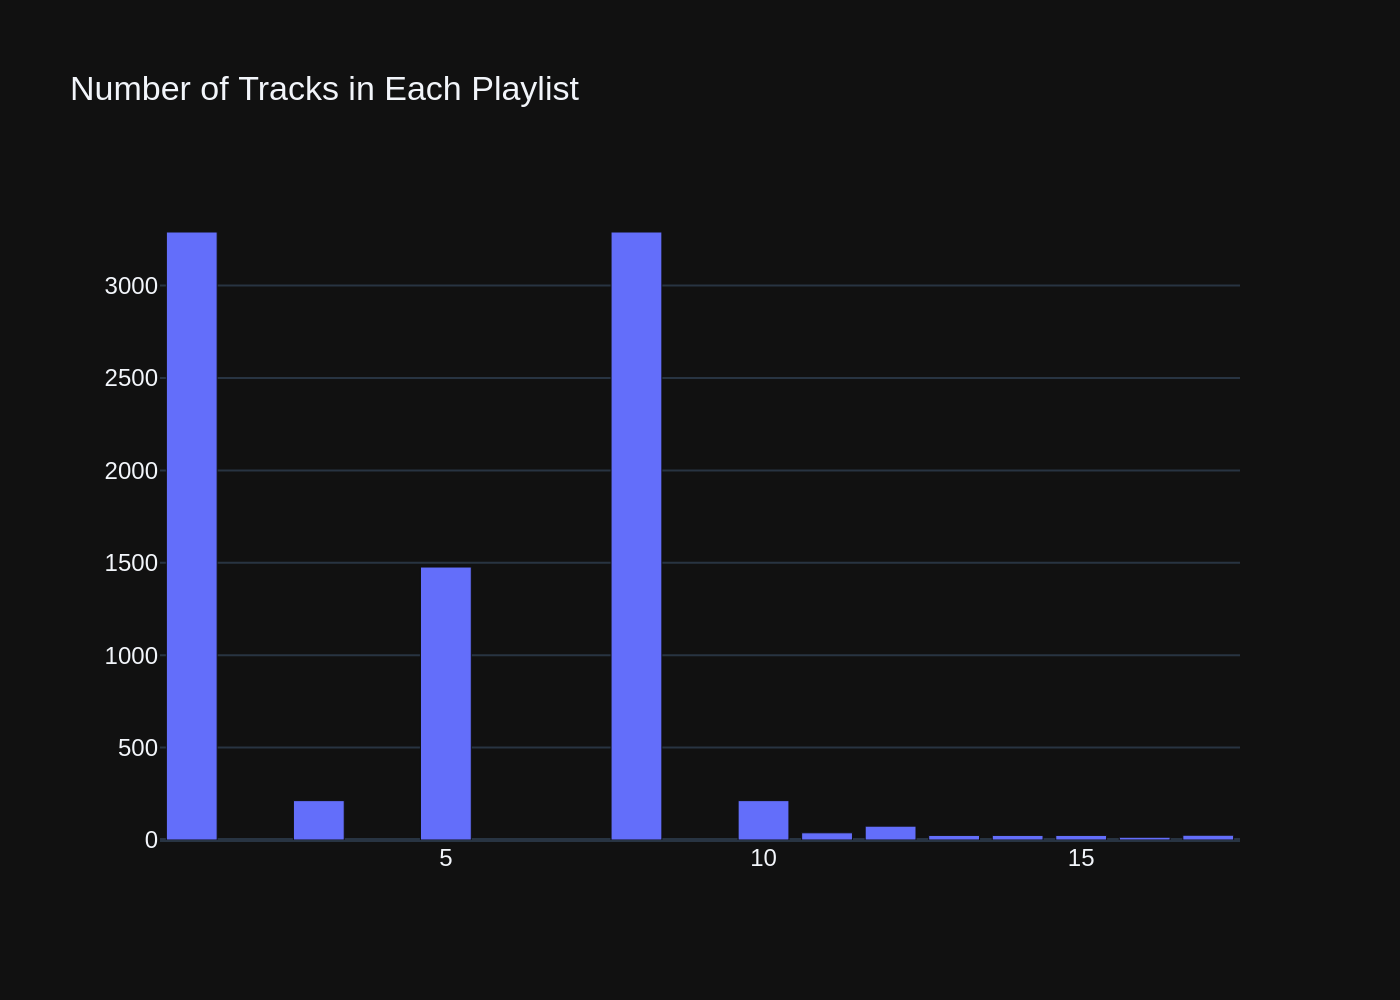

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2



# QUESTION - 25:  Identify artists who have albums with tracks appearing in multiple genres:


[( SQL Prompt )]
[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tO

SELECT DISTINCT ar.Name AS ArtistName
FROM artists ar
JOIN albums al ON ar.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId
GROUP BY ar.ArtistId, g.GenreId
HAVING COUNT(DISTINCT g.GenreId) > 1

,ArtistName


In [15]:
for n, question in enumerate(questions):
    # if n != 4: continue
    
    # if n > 5: continue
        
    my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

### Check completion time

In [16]:
ts_stop = time()
elapsed_time = ts_stop - ts_start
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'deepseek-coder-v2' 
 took 1650 sec
 run on 'ducklover1' 
 at 20241012-133825


In [17]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-deepseek-coder-v2-1650s-ducklover1-20241012-133825.csv'

### Save training data

In [18]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,1d7747b2-4595-50e7-aba6-e9977afc4481-sql,List all genres and the number of tracks in ea...,"\nSELECT g.Name AS GenreName, COUNT(t.TrackId...",sql
1,1fab2c67-0737-56ab-b3f1-33202750520a-sql,Find the top 5 most expensive tracks (based on...,"SELECT Name, UnitPrice\nFROM tracks\nORDER BY...",sql
2,2057af51-0925-581d-aad4-e1c8fa6b02de-sql,Find the customer who bought the most albums i...,"SELECT c.CustomerId, c.FirstName, c.LastName...",sql
3,2e2c32b7-40e9-5f31-975e-f70304ca85be-sql,\n Can you find the top 10 most popula...,"SELECT a.ArtistId, a.Name AS ArtistName, COUN...",sql
4,30dadc3c-1c94-52c5-a81e-4970d8d4c0cd-sql,Get all playlists containing at least 10 track...,"SELECT p.PlaylistId, COUNT(pt.TrackId) AS Trac...",sql
5,36d67a5d-4f89-5592-a61a-d8a768bcf02c-sql,Get the average invoice total for each customer:,"SELECT CustomerId, AVG(Total) AS AverageInvoi...",sql
6,3c42c397-fe40-5629-ba95-4c8764b87790-sql,"Find all tracks with a name containing ""What"" ...",SELECT * FROM tracks\nWHERE LOWER(Name) LIKE ...,sql
7,5610475a-bbee-5f6a-bb08-7987a50220a7-sql,List all albums and their corresponding artist...,"SELECT a.Title AS AlbumTitle, ar.Name AS Artis...",sql
8,59ee3f97-0080-5db6-b709-b94fb9308167-sql,Find the total number of invoices per country,"SELECT BillingCountry, COUNT(*) AS TotalInvoi...",sql
9,5f93b5e8-549d-5c06-bf3f-22f32f65b1c5-sql,\n For the question what are the top 5 ...,"SELECT country AS Top5Countries, COUNT(*) AS C...",sql


In [19]:
df_training_data.to_csv(file_csv, index=False)